In [450]:
import time
import pandas as pd
import psycopg2
import datetime
from tqdm import trange
import matplotlib.pyplot as plt 
import matplotlib as mpl 
# %matplotlib inline 
import platform
import numpy as np
from matplotlib import font_manager, rc # plt.rcParams['axes.unicode_minus'] = False 
if platform.system() == 'Darwin': rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
    path = "c:/Windows/Fonts/malgun.ttf" 
    font_name = font_manager.FontProperties(fname=path).get_name() 
    rc('font', family=font_name) 
else: 
    print('Unknown system... sorry~~~~')
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2

In [157]:
    # row 생략 없이 출력
pd.set_option('display.max_rows', 1000)
# col 생략 없이 출력
pd.set_option('display.max_columns', 1000)
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2

In [154]:
!pip install tqdm

In [155]:
from tqdm import tqdm
from tqdm import trange

In [3]:
total_shop_stock = pd.read_csv("total_shop_stock.csv")

In [36]:
total_shop_stock = total_shop_stock.iloc[ :,1:]

479

In [4]:
shop_info_pd = pd.read_csv("shop_info_pd.csv")

In [177]:
shop_info_pd = shop_info_pd.iloc[ :,1:]

In [178]:
shop_info_pd

,shopkey,shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm
0,M110,신세계인천close,(주)신세계백화점인천점,MH0325,일반매장,백화점특정,백화점,인천
1,M017,AK평택close,MLB AK 평택점,MH0043,일반매장,백화점특정,백화점,경기
2,M188,AK구로 close,애경유지공업(주),MH0040,일반매장,백화점특정,백화점,서울
3,M618,군산(대-위)clo,M.L.B(W.W.S),MH0585,일반매장,대리점,대리점,전북
4,M644,경주(대-위)clo,MLB경주,MH0500,일반매장,대리점,대리점,경북
5,M645,안산(대-위)close,엠엘비(MLB)안산점,MH1050,일반매장,대리점,대리점,경기
6,X10082,LF스퀘어광양,디스커버리 LF스퀘어 광양점,XH0097,일반매장,백화점특정,백화점,전남
7,X10023,갤러리아대전,디스커버리 갤러리아 대전점,XH0219,일반매장,백화점특정,백화점,대전
8,X10056,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남
9,X10052,롯데강남,디스커버리 롯데 강남점,XH0254,일반매장,백화점특정,백화점,서울


In [9]:
bucket_dwalker = pd.read_csv('bucket_dwalker.csv')

In [38]:
bucket_dwalker = bucket_dwalker.iloc[ :,1:]

In [6]:
bucket_dwalker_v2 = pd.read_csv('bucket_dwalker_v2.csv')

In [39]:
bucket_dwalker_v2 = bucket_dwalker_v2.iloc[ :,1:]

In [189]:
# 로직

def zero_fill(shopkey, base,scskey_list):
    total=[]
    for col in base.columns:
        base[col].values[:] = 0
    for scskey in scskey_list:
        for shop in shopkey:
            frame = base.reset_index()
            target = bucket_dwalker[(bucket_dwalker['scskey']==scskey) & (bucket_dwalker['shopkey']==shop )].groupby('weekkey').sum().reset_index()
            target = target.reset_index()

            for i in range(0,len(target)):
                for j in range(0,len(frame)):
                        if target.iloc[i].weekkey == frame.iloc[j].weekkey:
                            frame.iloc[j] = target.iloc[i]
                            break
            for i in range(1,len(frame)):
                if frame.iloc[i].takeout_qty ==0 and frame.iloc[i].sale_qty==0:
                    frame.iloc[i] = [ frame.iloc[i]['weekkey'], 0, frame.iloc[i-1]['takeout_qty'], 0, frame.iloc[i-1]['sale_qty'], frame.iloc[i-1]['stock_qty']]
            frame['shopkey'] =shop
            frame['ratio'] = 0
            for i in range(0,len(frame)):
                total_sale_qty= frame['week_sale_qty'].sum()
                a = frame.iloc[i]
                if a['sale_qty']==0 :
                    frame.iloc[i] = [a[0],a[1] ,a[2] ,a[3] ,a[4] ,a[5],a[6] , 0]
                else:
                    if a['sale_qty'] / total_sale_qty > 1:
                        frame.iloc[i] = [a[0],a[1] ,a[2] ,a[3] ,a[4] ,a[5],a[6] , 1]
                    else:
                        frame.iloc[i] = [a[0],a[1] ,a[2] ,a[3] ,a[4] ,a[5],a[6] , a['sale_qty'] / total_sale_qty]
            else:
                frame['scskey']=scskey
            frame = pd.merge(frame, shop_info_pd, left_on='shopkey', right_on='shopkey', how='inner')
            total.append(frame)
    return total

In [190]:
scskey_list = ['X19SDXSH09911BE230','X19SDXSH09911BE235','X19SDXSH09911BE240','X19SDXSH09911BE260','X19SDXSH09911BE265','X19SDXSH09911BE270']
frame = bucket_dwalker[(bucket_dwalker['scskey']=='X19SDXSH09911BE240')][['shopkey','weekkey','week_takeout_qty','takeout_qty','week_sale_qty','sale_qty','stock_qty']].groupby('weekkey').sum()
bucket_dwalker_shop_key = bucket_dwalker['shopkey'].unique()


shop_weeks = zero_fill(bucket_dwalker_shop_key, frame,scskey_list)

In [191]:
shop_weeks_df = pd.concat(shop_weeks)

In [369]:
shop_weeks_df_ori = shop_weeks_df.copy()

In [193]:
len(shop_weeks_df)

45474

In [194]:
department_weeks_mean = shop_weeks_df[shop_weeks_df['type_zone_nm']=='백화점'].groupby('weekkey').mean()
department_weeks_mean

,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio
weekkey,,,,,,
2018-12-31,0.763682,0.763682,0.019900,0.019900,0.743781,0.000337
2019-01-07,0.022388,0.786070,0.077114,0.097015,0.689055,0.002469
2019-01-14,0.895522,1.676617,1.024876,1.121891,0.554726,0.027538
2019-01-21,0.781095,2.440299,0.726368,1.848259,0.592040,0.045599
2019-01-28,0.639303,3.057214,0.619403,2.467662,0.589552,0.062993
2019-02-04,0.012438,3.034826,0.970149,3.437811,-0.402985,0.092707
2019-02-11,0.604478,3.616915,0.743781,4.176617,-0.559701,0.110774
2019-02-18,2.174129,5.741294,0.902985,5.077114,0.664179,0.135500
2019-02-25,0.783582,6.462687,1.176617,6.253731,0.208955,0.166079


In [74]:
agency_weeks_mean = shop_weeks_df[shop_weeks_df['type_zone_nm']=='대리점'].groupby('weekkey').mean()
agency_weeks_mean

,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio
weekkey,,,,,,
2018-12-31,1.642857,1.642857,0.057143,0.057143,1.585714,0.003110
2019-01-07,0.000000,1.642857,0.142857,0.200000,1.442857,0.011119
2019-01-14,0.414286,2.057143,0.814286,1.014286,1.042857,0.059889
2019-01-21,0.342857,2.400000,0.671429,1.685714,0.714286,0.098857
2019-01-28,0.085714,2.428571,0.428571,2.114286,0.314286,0.119241
2019-02-04,0.000000,2.385714,0.385714,2.500000,-0.114286,0.140713
2019-02-11,0.342857,2.700000,0.457143,2.957143,-0.257143,0.166623
2019-02-18,1.885714,4.571429,0.471429,3.414286,1.157143,0.186895
2019-02-25,0.700000,5.042857,0.828571,4.242857,0.800000,0.231576


In [79]:
department_weeks_mean = department_weeks_mean.reset_index()

In [82]:
agency_weeks_mean = agency_weeks_mean.reset_index()

In [81]:
department_weeks_mean['weekkey'] = pd.to_datetime(department_weeks_mean['weekkey'])

In [83]:
agency_weeks_mean['weekkey'] = pd.to_datetime(agency_weeks_mean['weekkey'])

In [87]:
department_weeks_mean = department_weeks_mean.set_index('weekkey')
agency_weeks_mean = agency_weeks_mean.set_index('weekkey')

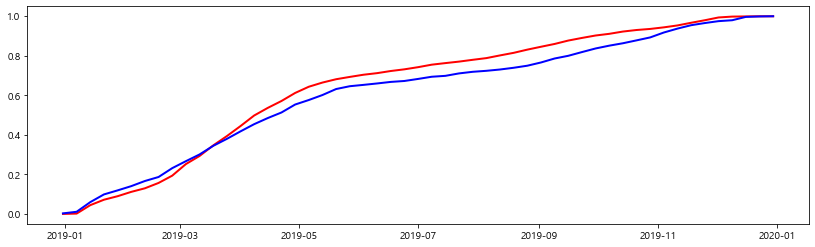

In [88]:
plt.plot(department_weeks_mean.index, department_weeks_mean['ratio'],'r')
plt.plot(agency_weeks_mean.index, agency_weeks_mean['ratio'],'b')
plt.show()

In [93]:
shop_list_pd = pd.read_csv('shop_list.csv')
shop_list_pd = shop_list_pd.iloc[ :,1:]

In [94]:
shop_list_pd

,shopkey
0,X10052
1,X10008
2,X30015
3,X50047
4,X50107
...,...
138,X10043
139,X10020
140,X50015
141,X50078


In [97]:
total_shop_stock['weekkey'] = pd.to_datetime(total_shop_stock['weekkey'])

In [103]:
df_INNER_JOIN = pd.merge(shop_list_pd, total_shop_stock, left_on='shopkey', right_on='shopkey', how='inner')

In [133]:
shop_stock_2019 = df_INNER_JOIN[(df_INNER_JOIN['weekkey']< '20200101') & (df_INNER_JOIN['weekkey']> '20181231') ]
shop_stock_2020 = df_INNER_JOIN[df_INNER_JOIN['weekkey']> '20191231' ]

In [ ]:
shop_stock_2019.groupby([,'scskey'])

In [156]:
frame2 = shop_stock_2019[(shop_stock_2019['scskey']=='X19SDXSH09911BE240')][['shopkey','weekkey','week_takeout_qty','takeout_qty','week_sale_qty','sale_qty','stock_qty']].groupby('weekkey').sum()
shop_stock_key_2019 = shop_stock_2019['shopkey'].unique()

total_sum_salty = 0
for i in trange(0,len(shop_stock_key_2019)):
    total=0
    shop_stock= shop_stock_2019[shop_stock_2019['shopkey']==shop_stock_key_2019[i]]
    shop_scs_key_2019 = shop_stock['scskey'].unique()
    for j in shop_scs_key_2019:
        print(j)
        total+= shop_stock_2019[shop_stock_2019['scskey']==j]['sale_qty'].max()
    total_sum+=total

  0%|                                                                                          | 0/143 [00:00<?, ?it/s]

X18SDXSH10811BK235
X18SDXSH21811BK240
X18SDXSH21811BK260
X18SDXSH73831OR240
X18SDXSH74831BK260
X18SDXSH74831WH230
X18SDXSH75831BG260
X18SDXSH77831LG260
X18SDXSH80831LA250
X18SDXSH80831LA260
X18SDXSH82831DP240
X18SDXSH82831WH235
X18SDXSH82831WH250
X18FDKSH64841BK180
X18FDKSH64841MG190
X18FDKSH69841BK170
X18FDKSH69841BK190
X18FDKSH69841PK200
X18FDXSH03841GR260
X18FDXSH03841GR265
X18FDXSH03841NY270
X18FDXSH09841BK265
X18FDXSH09841WH250
X18FDXSH13841BK240
X18FDXSH13841BK260
X18FDXSH13841BK270
X18FDXSH13841NY270
X18FDXSH13841RD230
X18FDXSH16841BK230
X18FDXSH16841GR250
X18FDXSH16841RD230
X18FDXSH16841WH240
X18FDXSH17841NY230
X18FDXSH17841NY245
X18FDXSH17841WH230
X18FDXSH17841WH245
X18FDXSH33841BK240
X18FDXSH41841BK245
X18FDXSH41841GR235
X18FDXSH41841GR240
X18FDXSH42841OR250
X18FDXSH42841WH250
X18FDXSH42841WH260
X18FDXSH43841GN260
X18FDXSH70841PK240
X18FDXSH11841BK270
X18FDXSH05841BK240
X18FDXSH05841BK270
X18FDXSH05841NY250
X18FDXSH05841NY265
X18FDXSH05841NY285
X18FDXSH05841OR240
X18FDXSH0584

X19FDXSH10941BK250
X19FDXSH10941BK265
X19FDXSH10941WH235
X19FDXSH11961BK270
X19FDXSH11961GR260
X19FDXSH12961WH240
X19FDXSH13961BE230
X19FDXSH13961BK250
X19FDXSH13961BK265
X19FDXSH13961BK280
X19FDXSH13961PK230
X19FDXSH13961PK250
X19FDXSH14961BE230
X19FDXSH72961BK240
X19FDXSH72961BK270
X19FDXSH72961BK280
X19FDXSH78941BK270
X19FDXSH04961BK230
X19FDXSH04961BK240
X19FDXSH04961PK250
X19FDXSH09961BE235
X19FDXSH09961BE240
X19FDXSH09961BK235
X19FDXSH09961BK280
X19FDXSH09961WH240
X19FDXSH11941WH250
X19FDXSH11941WH280
X19FDXSH13961BE250
X19FDXSH13961BK235
X19FDXSH14961BE280
X19FDXSH14961BK270
X19FDXSH70941BK270
X19FDXSH70941BK290
X19FDXSH70941NY240
X19FDXSH70941NY270
X19FDXSH70941WH260
X19FDXSH70941WH270
X20SDXSH70031BE280
X20SDXSH70031BK250
X20SDXSH70031BK260
X20SDXSH70031BK280
X20SDXSH70031KA270
X20SDXSH70031KA290
X20SDXSH70031PK250
X20SDXSH70031WH240
X20SDXSH70031WH270
X20SDXSH7A031WH240
X20SDXSH7B031BK260
X20SDXSH7C031BE250
X20SDXSH7C031BE260
X20SDXSH7D031BG240
X20SDXSH7D031BG270
X20SDXSH8A03

X20SDXSHG1031BE245
X20SDXSHG1031BE270
X20SDXSHG1031BE280
X19SDXSH04931CG240
X19SDXSH04931GR240
X19SDXSH04931GR245
X19SDXSH04931GR250
X19SDXSH09911GR255
X19SDXSH09911WH250
X19SDXSH26931WH230
X19SDXSH76931NY270
X19SDXSH82931BK270
X19SDXSH82931GR235
X19SDXSH82931VO235
X19SDXSH04931CG280
X19SDXSH04931GR255
X19SDXSH04931GR265
X19SDXSH04931PK235
X19SDXSH09911BE230
X19SDXSH09911BE255
X19SDXSH09911BE290
X19SDXSH09911BK260
X19SDXSH09911BK290
X19SDXSH09911GR265
X19SDXSH09911GR275
X19SDXSH09911GR280
X19SDXSH09911WH240
X19SDXSH09911WH245
X19SDXSH10931RD260
X19SDXSH11911WH250
X19SDXSH24911WH230
X19SDXSH24911WH240
X19SDXSH24911WH260
X19SDXSH70931BE270
X19SDXSH70931BE280
X19SDXSH70931KA270
X19SDXSH70931NY240
X19SDXSH70931NY250
X19SDXSH70931NY280
X19SDXSH74931BK230
X19SDXSH74931BK250
X19SDXSH76931NY280
X19SDXSH78931BK230
X19SDXSH78931BK270
X19SDXSH78931BK280
X19SDXSH78931WH280
X19SDXSH82931OW265
X19SDXSH82931OW275
X19SDXSH82931VO245
X19SDKSH37911BK200
X19SDKSH37911BK220
X19SDKSH37911WH200
X19SDXSH0291

  1%|▌                                                                               | 1/143 [00:50<1:58:49, 50.21s/it]

X20SDXSHJ1031WH260
X20SDXSHJ2031MU250
X20SDXSHP1031WH230
X20SDXSHP1031WH270
X20SDXSHP2031WW240
X18FDKSH64841BK200
X18FDKSH64841GR210
X18FDKSH64841MG220
X18FDKSH69841BK170
X18FDKSH69841BK190
X18FDKSH69841PK190
X18FDKSH69841PK200
X18FDXSH03841NY240
X18FDXSH03841NY260
X18FDXSH05841BK250
X18FDXSH08841BK265
X18FDXSH08841KA275
X18FDXSH16841BK245
X18FDXSH17841BK230
X18FDXSH17841BK235
X18FDXSH44841RD230
X18FDXSH70841BK280
X18FDXSH70841PK240
X18FDXSH70841WH250
X18FDXSH03841GR230
X18FDXSH05841GR260
X18FDXSH05841NY270
X18FDXSH05841NY275
X18FDXSH05841OR265
X18FDXSH08841BK260
X18FDXSH08841BK275
X18FDXSH08841BK280
X18FDXSH08841DP235
X18FDXSH08841KA250
X18FDXSH09841BK260
X18FDXSH09841NY230
X18FDXSH09841NY235
X18FDXSH09841NY270
X18FDXSH11841BK245
X18FDXSH11841NY265
X18FDXSH11841NY270
X18FDXSH11841RD240
X18FDXSH11841RD275
X18FDXSH13841NY240
X18FDXSH13841RD230
X18FDXSH13841RD250
X18FDXSH41841BK240
X18FDXSH41841GR230
X18FDXSH41841GR235
X18FDXSH41841GR245
X18FDXSH41841WH230
X18FDXSH41841WH245
X18FDXSH4284

X18FDXSH70841BK270
X18FDXSH70841NY280
X18SDXSH70831BG230
X19FDXSH04961BK255
X19FDXSH04961CG230
X19FDXSH04961CG270
X19FDXSH09961BE230
X19FDXSH09961BK240
X19FDXSH09961BK250
X19FDXSH09961BK270
X19FDXSH09961BK275
X19FDXSH09961OW240
X19FDXSH09961OW255
X19FDXSH09961OW265
X19FDXSH09961OW280
X19FDXSH09961WH245
X19FDXSH09961WH255
X19FDXSH09961WH260
X19FDXSH11941WH240
X19FDXSH11961GR230
X19FDXSH13961BE265
X19FDXSH13961BE280
X19FDXSH13961PK230
X19FDXSH13961PK240
X19FDXSH14961BE230
X19FDXSH14961BE240
X19FDXSH14961BE270
X19FDXSH14961BK240
X19FDXSH70941BK260
X19FDXSH70941BK270
X19FDXSH70941NY290
X19FDXSH70941WH250
X19FDXSH70941WH270
X19FDXSH73961BK240
X19FDXSH73961BK280
X19FDXSH73961ML230
X19FDXSH73961ML240
X19FDXSH73961ML270
X19FDXSH75941BK280
X19FDXSH75941RD250
X20SDXSH70031BE240
X20SDXSH70031BE250
X20SDXSH70031BK270
X20SDXSH70031BK280
X20SDXSH70031KA250
X20SDXSH70031KA270
X20SDXSH70031NY260
X20SDXSH70031WH270
X20SDXSH7A031WH240
X20SDXSH7B031BK230
X20SDXSH7B031BK240
X20SDXSH7B031BK270
X20SDXSH7C03

X19SDXSH06931GR235
X19SDXSH06931GR270
X19SDXSH06931WH230
X19SDXSH09911BE235
X19SDXSH09911BE240
X19SDXSH09911BE245
X19SDXSH09911BE275
X19SDXSH09911BK260
X19SDXSH09911BK270
X19SDXSH09911BK275
X19SDXSH09911GR230
X19SDXSH09911GR245
X19SDXSH09911GR250
X19SDXSH09911WH240
X19SDXSH09911WH260
X19SDXSH09911WH265
X19SDXSH09911WH290
X19SDXSH10931BL240
X19SDXSH12931BL250
X19SDXSH12931WH260
X19SDXSH13911BK230
X19SDXSH13911BK250
X19SDXSH13911PK230
X19SDXSH13911WH260
X19SDXSH13911WH270
X19SDXSH70931BE240
X19SDXSH70931BE260
X19SDXSH70931BK260
X19SDXSH70931BK280
X19SDXSH70931KA230
X19SDXSH70931NY230
X19SDXSH70931NY280
X19SDXSH70931NY290
X19SDXSH70931PK230
X19SDXSH70931WH240
X19SDXSH70931WH270
X19SDXSH70931WH290
X19SDXSH71931BK230
X19SDXSH71931GR260
X19SDXSH71931NY260
X19SDXSH71931NY280
X19SDXSH73931BK230
X19SDXSH73931BK240
X19SDXSH73931KA250
X19SDXSH73931WH240
X19SDXSH73931WH280
X19SDXSH74931BE230
X19SDXSH74931BK230
X19SDXSH74931BK270
X19SDXSH76931BK230
X19SDXSH76931BK240
X19SDXSH76931BK260
X19SDXSH7693

X20SDXSH7D031BG280
X20SDXSH8A031WH230
X20SDXSH8C031WW250
X20SDXSH8C031WW270
X20SDXSH9D031BE230
X20SDXSHA2011BK225
X20SDXSHE2031MU240
X20SDXSHE2031MU250
X20SDXSHF2031WW240
X20SDXSHF2031WW270
X20SDXSHF5031BK245
X20SDXSHF5031BK265
X20SDXSH9A031WH250
X20SDXSH9A031WH260
X20SDXSH9A031WH280
X20SDXSH9C031ZB240
X20SDXSH9C031ZB250
X20SDXSH9C031ZB280
X20SDXSHA4011GR245
X20SDXSHA4011GR280
X20SDXSHE1031WH235
X20SDXSHF2031WW275
X20SDXSHJ1031WH240
X20SDXSHJ1031WH260
X20SDXSHJ1031WH270
X20SDXSHJ2031MU240
X20SDXSHJ3031BK245
X20SDXSHP1031WH240
X20SDXSHP1031WH250
X20SDXSHP1031WH270
X20SDXSHP2031WW250
X20SDXSHQ1031WH230
X20SDXSHQ2031WW240
X19FDXSH01961BE265
X19FDXSH01961BE270
X19FDXSH01961BE280
X19FDXSH01961BK230
X19FDXSH01961BK265
X19FDXSH10941BK250
X19FDXSH10941BK260
X19FDXSH72961BK230
X19FDXSH72961ML250
X19FDXSH82941BK265
X20SDXSH9A031WH240
X20SDXSH9A031WH270
X20SDXSHA4011GR265
X20SDXSHE1031WH280
X20SDXSHE3031WW240
X20SDXSHE3031WW245
X20SDXSHE3031WW250
X20SDXSHF6031WH280
X20SDXSHG2031BK260
X20SDXSHJ103

  1%|█                                                                               | 2/143 [01:50<2:05:03, 53.22s/it]

X20SDXSHJ2031MU250
X20SDXSHJ3031BK235
X20SDXSHJ3031BK250
X20SDXSHP1031WH230
X20SDXSHQ2031WW230
X18FDXSH14841BL240
X18FDXSH16841WH235
X18FDXSH43841GN240
X18FDXSH43841GN260
X18FDXSH43841WH230
X18FDXSH44841RD250
X18FDXSH70841BK240
X18FDXSH70841WH240
X18FDKSH64841GR210
X18FDKSH69841BK190
X18FDXSH03841BK255
X18FDXSH03841GR250
X18FDXSH14841PK230
X18FDXSH14841SI240
X18FDXSH43841GN250
X18FDXSH43841WH250
X18FDXSH43841WH260
X18FDXSH43841WH280
X18FDXSH44841LA230
X18FDXSH44841LA250
X18FDXSH44841LA260
X18FDXSH44841LA270
X18FDXSH44841RD280
X18FDKSH64841GR200
X18FDXSH03841BK280
X18FDXSH05841BK280
X18FDXSH05841GR240
X18FDXSH05841GR265
X18FDXSH05841NY230
X18FDXSH05841NY240
X18FDXSH05841NY255
X18FDXSH05841NY265
X18FDXSH05841OR250
X18FDXSH08841BK235
X18FDXSH08841BK275
X18FDXSH08841DP235
X18FDXSH08841DP250
X18FDXSH08841DP260
X18FDXSH08841DP280
X18FDXSH08841GR230
X18FDXSH08841KA260
X18FDXSH09841BK235
X18FDXSH09841BK250
X18FDXSH09841BK275
X18FDXSH09841NY245
X18FDXSH09841NY270
X18FDXSH09841RD240
X18FDXSH0984

X19FDXSH82941GR230
X19FDXSH82941GR235
X20SDXSH70031BE260
X20SDXSH70031KA240
X20SDXSH70031KA280
X20SDXSH70031NY260
X20SDXSH70031PK240
X20SDXSH70031PK250
X20SDXSH70031WH230
X20SDXSH70031WH260
X20SDXSH8B031BK230
X20SDXSH8B031BK250
X20SDXSH9A031WH230
X20SDXSH9A031WH250
X20SDXSH9C031ZB280
X20SDXSH9D031BE270
X20SDXSHA1011WH245
X20SDXSHA1011WH270
X20SDXSHA2011BK225
X20SDXSHA2011BK235
X20SDXSHA3011BE225
X20SDXSHA3011BE230
X20SDXSHA3011BE235
X20SDXSHA3011BE250
X20SDXSHA3011BE255
X20SDXSHA3011BE260
X20SDXSHA3011BE270
X20SDXSHA5011OW225
X20SDXSHA5011OW230
X20SDXSHA5011OW245
X20SDXSHA5011OW270
X20SDXSHE1031WH270
X20SDXSHE3031WW250
X20SDXSHF3031GR280
X20SDXSHF4031BE275
X20SDXSHF5031BK245
X20SDXSHF6031WH280
X20SDXSHG1031BE240
X20SDXSHJ1031WH240
X20SDXSHP1031WH280
X20SDXSHP2031WW230
X20SDXSHP2031WW240
X20SDXSHQ1031WH240
X19FDXSH01961BE265
X19FDXSH01961BK235
X19FDXSH01961BK265
X19FDXSH04961BK250
X19FDXSH04961BK270
X19FDXSH04961BK275
X19FDXSH04961CG240
X19FDXSH07961WH260
X19FDXSH09961BE240
X19FDXSH0996

X19FDXSH09961WH230
X19FDXSH09961WH240
X19FDXSH10941BK260
X19FDXSH11941WH270
X19FDXSH11961BK230
X19FDXSH11961BK250
X19FDXSH11961BK270
X19FDXSH11961GR260
X19FDXSH13961BE240
X19FDXSH13961BE250
X19FDXSH13961BE265
X19FDXSH13961BE270
X19FDXSH13961BK240
X19FDXSH13961BK265
X19FDXSH14961BE230
X19FDXSH14961BE270
X19FDXSH14961BK230
X19FDXSH14961BK240
X19FDXSH70941BK240
X19FDXSH70941BK250
X19FDXSH70941BK280
X19FDXSH70941NY280
X19FDXSH70941WH270
X19FDXSH73961ML260
X19FDXSH75941BK260
X19FDXSH78941BK250
X19FDXSH82941GR270
X19SDKSH37911BK180
X19SDKSH37911BK220
X19SDKSH37911WH200
X19SDXSH01911GR250
X19SDXSH01911GR280
X19SDXSH02911BK250
X19SDXSH05931BK230
X19SDXSH05931BK265
X19SDXSH05931BK270
X19SDXSH05931WH270
X19SDXSH05931WH280
X19SDXSH06931BK230
X19SDXSH06931BK250
X19SDXSH06931BK265
X19SDXSH06931GR230
X19SDXSH06931WH290
X19SDXSH07911BK260
X19SDXSH08911BK250
X19SDXSH09911GR275
X19SDXSH10931BK240
X19SDXSH10931BL230
X19SDXSH10931BL260
X19SDXSH10931RD230
X19SDXSH12931BL260
X19SDXSH13911WH240
X19SDXSH1391

  1%|█                                                                               | 2/143 [02:33<3:00:12, 76.68s/it]


KeyboardInterrupt: 

In [ ]:
total_sum

In [134]:
stock_2019 = shop_stock_2019.groupby(['weekkey','shopkey',]).sum()
stock_2020 = shop_stock_2020.groupby(['weekkey','shopkey']).sum()

In [135]:
stock_2019 = stock_2019.reset_index()
stock_2020 = stock_2020.reset_index()

In [136]:
shop_key_list = stock_2020['shopkey'].unique()

In [137]:
stock_sum_2019 = []
stock_sum_2020 = []
stock_plus_2019 = []
stock_takeout_2019 = []
stock_takeout_2020 = []
stock_sale_2019 = []
stock_sale_2020 = []
stock_ratio_2019=[]
stock_ratio_2020=[]
sale_takeout_2019=[]
sale_takeout_2020=[]

for i in shop_key_list:
    stock_sale_2019.append(stock_2019[stock_2019['shopkey']==i]['week_sale_qty'].sum())
    stock_plus_2019.append( round(stock_2019[stock_2019['shopkey']==i]['week_sale_qty'].sum()*1.2))
    stock_sale_2020.append(stock_2020[stock_2020['shopkey']==i]['week_sale_qty'].sum())
    stock_takeout_2019.append(stock_2019[stock_2019['shopkey']==i]['week_takeout_qty'].sum())
    stock_takeout_2020.append(stock_2020[stock_2020['shopkey']==i]['week_takeout_qty'].sum())
#     stock_sale_2019.append(stock_2019[stock_2019['shopkey']==i]['sale_qty'].sum())
#     stock_sale_2020.append(stock_2020[stock_2020['shopkey']==i]['sale_qty'].sum())
    stock_ratio_2019.append(stock_2019[stock_2019['shopkey']==i].sum()['stock_qty'] / stock_2019[stock_2019['shopkey']==i].sum()['takeout_qty'])
    stock_ratio_2020.append(stock_2020[stock_2020['shopkey']==i].sum()['stock_qty'] / stock_2020[stock_2020['shopkey']==i].sum()['takeout_qty'])
    sale_takeout_2019.append(stock_2019[stock_2019['shopkey']==i].sum()['week_sale_qty'] / stock_2019[stock_2019['shopkey']==i].sum()['week_takeout_qty'])
    sale_takeout_2020.append(stock_2020[stock_2020['shopkey']==i].sum()['week_sale_qty'] / stock_2020[stock_2020['shopkey']==i].sum()['week_takeout_qty'])

#     stock_ratio_2019.append( stock_2019[stock_2019['shopkey']==i]['week_sale_qty'].sum()/ )
#     stock_ratio_2020.append()
#     break
    

In [138]:
df = pd.DataFrame(
                {'shopkey' : shop_key_list,
                 '주 별 총 판매량(2019)' : stock_sale_2019,
                '주 별 총 판매량(2020)' : stock_sale_2020,
                '주 별 총 입고량(2019)':stock_takeout_2019,
                 '주 별 총 입고량(2020)':stock_takeout_2020,
#                  'stock_plus_2019' : stock_plus_2019,
#                  'stock_takeout_2020':stock_takeout_2020,
#                  'stock_sale_2020':stock_sale_2020,
#                  '2019_재고비율':stock_ratio_2019,
#                  '2020_재고비율':stock_ratio_2020,
#                  '2019_판매_입고 비율':sale_takeout_2019,
#                  '2020_판매_입고 비율':sale_takeout_2020
                },
                )

df

,shopkey,주 별 총 판매량(2019),주 별 총 판매량(2020),주 별 총 입고량(2019),주 별 총 입고량(2020)
0,X10003,2312,3816,2590,4162
1,X10004,4745,4013,5149,4109
2,X10005,2123,2429,2514,2525
3,X10006,4603,8136,5232,8130
4,X10007,4426,6249,4864,6353
...,...,...,...,...,...
138,X50128,1356,1256,1439,1330
139,X50129,2000,3212,2177,3451
140,X50130,2184,2483,2518,2589
141,X50131,1062,1443,1073,1502


In [139]:
df['판매수량 비율(20/19)'] = df['주 별 총 판매량(2020)'] / df['주 별 총 판매량(2019)']
df['입고수량 비율(20/19)'] = df['주 별 총 입고량(2020)'] / df['주 별 총 입고량(2019)']

In [140]:
# stock_qty가 0인 경우 / 물건을 판매한 횟수 (이 경우는 물건이 없어서 못팔 확률이 높은 경우이다.)
week_zero_2019=[]
week_up_2019=[]
week_zero_2020=[]
week_up_2020=[]
for i in shop_key_list:
    week_zero_2019.append( shop_stock_2019[(shop_stock_2019['shopkey']==i) & (shop_stock_2019['stock_qty']==0)].count()[0] / shop_stock_2019[(shop_stock_2019['shopkey']==i)].count()[0])

    week_zero_2020.append( shop_stock_2020[(shop_stock_2020['shopkey']==i) & (shop_stock_2020['stock_qty']==0)].count()[0] /shop_stock_2020[(shop_stock_2020['shopkey']==i)].count()[0])


In [141]:
df2 = pd.DataFrame(
                {'shopkey' : shop_key_list,
                '매장 내 재고가 0 인 경우(2019)' : week_zero_2019,
                 '매장 내 재고가 0 인 경우(2020)' : week_zero_2020,
                },
                )

In [142]:
df3 = pd.merge(df,df2,on='shopkey',how="inner")

In [143]:
df4=df3.sort_values('판매수량 비율(20/19)',ascending=False)
df4

,shopkey,주 별 총 판매량(2019),주 별 총 판매량(2020),주 별 총 입고량(2019),주 별 총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),매장 내 재고가 0 인 경우(2019),매장 내 재고가 0 인 경우(2020)
55,X10070,2797,7052,3201,7344,2.521273,2.294283,0.269538,0.221719
43,X10057,2769,5795,3571,5584,2.092813,1.563708,0.273630,0.295598
50,X10064,3424,6923,3920,7318,2.021904,1.866837,0.301368,0.216508
37,X10050,5722,11534,6405,12274,2.015729,1.916315,0.232193,0.186933
93,X50057,745,1434,1076,1476,1.924832,1.371747,0.298601,0.283711
...,...,...,...,...,...,...,...,...,...
5,X10008,8846,5640,9540,5574,0.637576,0.584277,0.293291,0.232504
32,X10044,5834,3511,6263,3625,0.601817,0.578796,0.284938,0.257600
48,X10062,2822,1587,3248,1646,0.562367,0.506773,0.302156,0.297851
142,X50133,3830,2000,3931,1854,0.522193,0.471636,0.286828,0.287177


In [158]:
df4

,shopkey,주 별 총 판매량(2019),주 별 총 판매량(2020),주 별 총 입고량(2019),주 별 총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),매장 내 재고가 0 인 경우(2019),매장 내 재고가 0 인 경우(2020)
55,X10070,2797,7052,3201,7344,2.521273,2.294283,0.269538,0.221719
43,X10057,2769,5795,3571,5584,2.092813,1.563708,0.273630,0.295598
50,X10064,3424,6923,3920,7318,2.021904,1.866837,0.301368,0.216508
37,X10050,5722,11534,6405,12274,2.015729,1.916315,0.232193,0.186933
93,X50057,745,1434,1076,1476,1.924832,1.371747,0.298601,0.283711
36,X10048,1365,2612,1577,2832,1.913553,1.795815,0.388487,0.267570
42,X10056,1461,2702,1647,2840,1.849418,1.724347,0.353178,0.305859
92,X50055,657,1170,816,1285,1.780822,1.574755,0.327575,0.300230
19,X10027,2909,5178,3720,5150,1.779993,1.384409,0.291751,0.269544
3,X10006,4603,8136,5232,8130,1.767543,1.553899,0.291137,0.243843


In [159]:
shop_stock_key_2020 = shop_stock_2020['shopkey'].unique()

total_sum_salty = []
total_sum_takeout = []
total_return_salty=[]
total_sum_take_ware=[]

for i in trange(0,len(shop_stock_key_2020)):
    takeout_qty = 0
    sale_qty = 0
    take_ware = 0
    return_salty=0
    
    shop_stock= shop_stock_2020[shop_stock_2020['shopkey']==shop_stock_key_2020[i]]
    shop_scs_key_2020 = shop_stock['scskey'].unique()
    for j in shop_scs_key_2020:
        takeout_qty+= shop_stock[shop_stock['scskey']==j]['takeout_qty'].max()
        sale_qty+= shop_stock[shop_stock['scskey']==j]['sale_qty'].max()
        take_ware += int(shop_stock[(shop_stock['scskey']==j)&(shop_stock['week_takeout_qty']<0)]['week_takeout_qty'].sum())
        return_salty += int(shop_stock[(shop_stock['scskey']==j)&(shop_stock['week_sale_qty']<0)]['week_sale_qty'].sum())
    total_sum_takeout.append(takeout_qty)
    total_sum_salty.append(sale_qty)
    total_sum_take_ware.append(take_ware)
    total_return_salty.append(return_salty)


100%|████████████████████████████████████████████████████████████████████████████████| 143/143 [12:25<00:00,  5.22s/it]


In [162]:
df4 = pd.DataFrame([ x for x in zip(shop_stock_key_2020,total_sum_salty,total_sum_takeout,total_sum_take_ware,total_return_salty)])
df4.columns = ['shopkey','salty','takeout','take_ware','return_salty']
print(df4)

    shopkey  salty  takeout  take_ware  return_salty
0    X10052   2865     4174      -2433          -101
1    X10008  10656    12509      -1514          -157
2    X30015   6559     8384      -1192          -119
3    X50047   1906     3125       -900           -43
4    X50107   2020     3271       -847           -62
5    X50091   1497     2687       -836          -135
6    X50081   1532     2579       -745           -33
7    X10050  14632    17873      -2320          -450
8    X50117   3093     4597      -1046           -86
9    X50023   3289     4770      -1024           -90
10   X50129   4049     5692       -983          -108
11   X10025   4111     5585       -833           -81
12   X10015   2832     4172       -756           -81
13   X10053   7441     9432      -1607          -281
14   X10073   3474     4894       -838          -127
15   X50074   3023     4371       -898           -59
16   X50113   2429     3831      -1014          -106
17   X10035   6533     8486      -1336        

In [208]:
shop_total_sales = pd.read_csv("shop_total_sales.csv")

In [209]:
shop_total_sales = shop_total_sales.iloc[ :,1:]


In [210]:
shop_total_sales

,shopkey,salty2019,takeout2019,salty2020,takeout2020
0,X10052,1597,2832,2764,4174
1,X10008,9047,10927,10499,12509
2,X30015,3908,5628,6440,8384
3,X50047,1315,2970,1863,3125
4,X50107,1224,2726,1958,3271
5,X50091,1066,2435,1362,2687
6,X50081,835,2251,1499,2579
7,X10050,5668,8376,14182,17873
8,X50117,2320,4025,3007,4597
9,X50023,2093,3878,3199,4770


In [211]:
shop_total_sales.columns = ['shopkey','총 판매량(2019)','총 입고량(2019)','총 판매량(2020)','총 입고량(2020)']
shop_total_sales

,shopkey,총 판매량(2019),총 입고량(2019),총 판매량(2020),총 입고량(2020)
0,X10052,1597,2832,2764,4174
1,X10008,9047,10927,10499,12509
2,X30015,3908,5628,6440,8384
3,X50047,1315,2970,1863,3125
4,X50107,1224,2726,1958,3271
5,X50091,1066,2435,1362,2687
6,X50081,835,2251,1499,2579
7,X10050,5668,8376,14182,17873
8,X50117,2320,4025,3007,4597
9,X50023,2093,3878,3199,4770


In [212]:
shop_total_sales['판매수량 비율(20/19)'] = shop_total_sales['총 판매량(2020)'] / shop_total_sales['총 판매량(2019)']
shop_total_sales['입고수량 비율(20/19)'] = shop_total_sales['총 입고량(2020)'] / shop_total_sales['총 입고량(2019)']

In [220]:
shop_total_sales['판매 비율(19/19)'] = shop_total_sales['총 판매량(2019)']/ shop_total_sales['총 입고량(2019)']
shop_total_sales['판매 비율(20/20)'] = shop_total_sales['총 판매량(2020)'] / shop_total_sales['총 입고량(2020)'] 

In [222]:
.to_csv('shop_total_sales.csv')

In [223]:
shop_total_sales.sort_values('판매수량 비율(20/19)',ascending=False)

,shopkey,총 판매량(2019),총 입고량(2019),총 판매량(2020),총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),판매 비율(19/19),판매 비율(20/20)
82,X10070,2842,4298,8776,11012,3.087966,2.562122,0.661238,0.796949
130,X10057,2842,4881,7257,9722,2.553483,1.991805,0.582258,0.746451
7,X10050,5668,8376,14182,17873,2.502117,2.133835,0.676695,0.793487
81,X10027,2984,4782,7036,11932,2.357909,2.495190,0.624007,0.589675
129,X10006,4823,6728,11168,13899,2.315571,2.065844,0.716855,0.803511
55,X50057,797,2074,1839,3064,2.307403,1.477338,0.384282,0.600196
28,X10064,3726,5409,8488,10827,2.278046,2.001664,0.688852,0.783966
50,X50001,1824,3257,4049,5758,2.219846,1.767885,0.560025,0.703196
69,X10056,1611,2841,3433,4801,2.130975,1.689898,0.567054,0.715059
20,X50005,1035,2311,2181,3444,2.107246,1.490264,0.447858,0.633275


<AxesSubplot:>

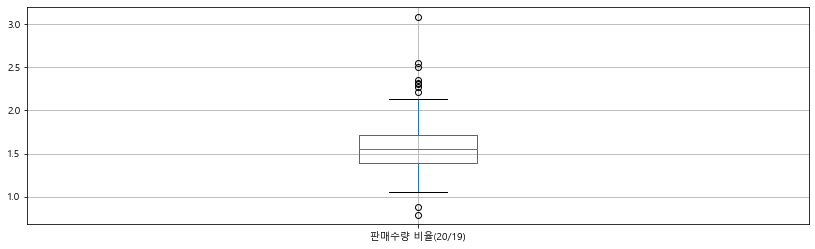

In [227]:
shop_total_sales.boxplot(column='판매수량 비율(20/19)')

In [230]:
shop_total_sales,shop_info_pd

,shopkey,총 판매량(2019),총 입고량(2019),총 판매량(2020),총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),판매 비율(19/19),판매 비율(20/20)
0,X10052,1597,2832,2764,4174,1.730745,1.473870,0.563912,0.662195
1,X10008,9047,10927,10499,12509,1.160495,1.144779,0.827949,0.839316
2,X30015,3908,5628,6440,8384,1.647902,1.489694,0.694385,0.768130
3,X50047,1315,2970,1863,3125,1.416730,1.052189,0.442761,0.596160
4,X50107,1224,2726,1958,3271,1.599673,1.199927,0.449010,0.598594
5,X50091,1066,2435,1362,2687,1.277674,1.103491,0.437782,0.506885
6,X50081,835,2251,1499,2579,1.795210,1.145713,0.370946,0.581233
7,X10050,5668,8376,14182,17873,2.502117,2.133835,0.676695,0.793487
8,X50117,2320,4025,3007,4597,1.296121,1.142112,0.576398,0.654122
9,X50023,2093,3878,3199,4770,1.528428,1.230015,0.539711,0.670650


In [442]:
shop_total_sales['판매수량 비율(20/19)'] - [입고수량 비율(20/19)]

,shopkey,총 판매량(2019),총 입고량(2019),총 판매량(2020),총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),판매 비율(19/19),판매 비율(20/20)
0,X10052,1597,2832,2764,4174,1.730745,1.473870,0.563912,0.662195
1,X10008,9047,10927,10499,12509,1.160495,1.144779,0.827949,0.839316
2,X30015,3908,5628,6440,8384,1.647902,1.489694,0.694385,0.768130
3,X50047,1315,2970,1863,3125,1.416730,1.052189,0.442761,0.596160
4,X50107,1224,2726,1958,3271,1.599673,1.199927,0.449010,0.598594
5,X50091,1066,2435,1362,2687,1.277674,1.103491,0.437782,0.506885
6,X50081,835,2251,1499,2579,1.795210,1.145713,0.370946,0.581233
7,X10050,5668,8376,14182,17873,2.502117,2.133835,0.676695,0.793487
8,X50117,2320,4025,3007,4597,1.296121,1.142112,0.576398,0.654122
9,X50023,2093,3878,3199,4770,1.528428,1.230015,0.539711,0.670650


In [233]:
shop_total_sales_info = pd.merge(shop_total_sales,shop_info_pd, left_on='shopkey', right_on='shopkey', how='inner')
shop_total_sales_info

,shopkey,총 판매량(2019),총 입고량(2019),총 판매량(2020),총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),판매 비율(19/19),판매 비율(20/20),shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm
0,X10052,1597,2832,2764,4174,1.730745,1.473870,0.563912,0.662195,롯데강남,디스커버리 롯데 강남점,XH0254,일반매장,백화점특정,백화점,서울
1,X10008,9047,10927,10499,12509,1.160495,1.144779,0.827949,0.839316,롯데건대,디스커버리 롯데 건대점,XH0200,일반매장,백화점특정,백화점,서울
2,X30015,3908,5628,6440,8384,1.647902,1.489694,0.694385,0.768130,타임스퀘어(직),디스커버리 타임스퀘어점,XH3008,일반매장,직영점,직영점,서울
3,X50047,1315,2970,1863,3125,1.416730,1.052189,0.442761,0.596160,순천중앙(대-위),디스커버리 순천중앙점,XH0048,일반매장,대리점,대리점,전남
4,X50107,1224,2726,1958,3271,1.599673,1.199927,0.449010,0.598594,제천(대-위),디스커버리 제천점,XH0063,일반매장,대리점,대리점,충북
5,X50091,1066,2435,1362,2687,1.277674,1.103491,0.437782,0.506885,서귀포(대-위),디스커버리 서귀포점,XH1000,일반매장,대리점,대리점,제주
6,X50081,835,2251,1499,2579,1.795210,1.145713,0.370946,0.581233,전주평화점(대-위),디스커버리 전주평화점,XH0009,일반매장,대리점,대리점,전북
7,X10050,5668,8376,14182,17873,2.502117,2.133835,0.676695,0.793487,롯데본점,디스커버리 롯데 본점,XH0248,일반매장,백화점특정,백화점,서울
8,X50117,2320,4025,3007,4597,1.296121,1.142112,0.576398,0.654122,아이즈빌부평(대-위),디스커버리 아이즈빌 부평점,XH0064,일반매장,대리점,대리점,인천
9,X50023,2093,3878,3199,4770,1.528428,1.230015,0.539711,0.670650,순천연향(대-위),디스커버리 순천연향점,XH0021,일반매장,대리점,대리점,전남


In [237]:
department_total_sales = shop_total_sales_info[shop_total_sales_info['type_zone_nm']=='백화점']

In [443]:
department_total_sales

,shopkey,총 판매량(2019),총 입고량(2019),총 판매량(2020),총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),판매 비율(19/19),판매 비율(20/20),shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm
0,X10052,1597,2832,2764,4174,1.730745,1.473870,0.563912,0.662195,롯데강남,디스커버리 롯데 강남점,XH0254,일반매장,백화점특정,백화점,서울
1,X10008,9047,10927,10499,12509,1.160495,1.144779,0.827949,0.839316,롯데건대,디스커버리 롯데 건대점,XH0200,일반매장,백화점특정,백화점,서울
7,X10050,5668,8376,14182,17873,2.502117,2.133835,0.676695,0.793487,롯데본점,디스커버리 롯데 본점,XH0248,일반매장,백화점특정,백화점,서울
11,X10025,2908,4289,4030,5585,1.385832,1.302168,0.678014,0.721576,롯데노원,디스커버리 롯데 노원점,XH0231,일반매장,백화점특정,백화점,서울
12,X10015,1675,2980,2751,4172,1.642388,1.400000,0.562081,0.659396,롯데포항,디스커버리 롯데 포항점,XH0214,일반매장,백화점특정,백화점,경북
13,X10053,4099,5847,7160,9432,1.746768,1.613135,0.701043,0.759118,신세계경기,디스커버리 신세계 경기점,XH0246,일반매장,백화점특정,백화점,경기
14,X10073,2384,3835,3347,4894,1.403943,1.276141,0.621643,0.683899,신세계마산,디스커버리 신세계 마산점,XH264,일반매장,백화점특정,백화점,경남
17,X10035,4029,5754,6309,8486,1.565897,1.474800,0.700209,0.743460,신세계의정부,디스커버리 신세계 의정부점,XH0226,일반매장,백화점특정,백화점,경기
18,X10080,3372,5372,3840,5663,1.138790,1.054170,0.627699,0.678086,엔터6왕십리,디스커버리 엔터식스 왕십리점,XH0266,일반매장,백화점특정,백화점,서울
23,X10060,6590,8481,10269,12451,1.558270,1.468105,0.777031,0.824753,AK수원,디스커버리 AK 수원점,XH0259,일반매장,백화점특정,백화점,경기


In [444]:
test = department_total_sales.sort_values('판매수량 비율(20/19)')

In [446]:
test['차이'] = test['판매수량 비율(20/19)']-test['입고수량 비율(20/19)']

In [449]:
test.sort_values('차이',ascending=False)

,shopkey,총 판매량(2019),총 입고량(2019),총 판매량(2020),총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),판매 비율(19/19),판매 비율(20/20),shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm,차이
130,X10057,2842,4881,7257,9722,2.553483,1.991805,0.582258,0.746451,현대목동,디스커버리 현대 목동점,XH0014,일반매장,백화점특정,백화점,서울,0.561679
82,X10070,2842,4298,8776,11012,3.087966,2.562122,0.661238,0.796949,신세계강남,디스커버리 신세계 강남점,XH0260,일반매장,백화점특정,백화점,서울,0.525844
87,X10048,1454,2655,3015,4316,2.073590,1.625612,0.547646,0.698563,아이파크용산,디스커버리 아이파크 용산점,XH0243,일반매장,백화점특정,백화점,서울,0.447978
69,X10056,1611,2841,3433,4801,2.130975,1.689898,0.567054,0.715059,갤러리아진주,디스커버리 갤러리아 진주점,XH0247,일반매장,백화점특정,백화점,경남,0.441077
7,X10050,5668,8376,14182,17873,2.502117,2.133835,0.676695,0.793487,롯데본점,디스커버리 롯데 본점,XH0248,일반매장,백화점특정,백화점,서울,0.368282
34,X10039,1449,2624,2883,4288,1.989648,1.634146,0.552210,0.672341,AK원주,디스커버리 AK 원주점,XH0230,일반매장,백화점특정,백화점,강원,0.355502
101,X10028,1427,2609,2841,4279,1.990890,1.640092,0.546953,0.663940,롯데일산,디스커버리 롯데 일산점,XH0229,일반매장,백화점특정,백화점,경기,0.350798
59,X10034,1896,3369,3435,4930,1.811709,1.463342,0.562778,0.696755,현대부산,디스커버리 현대 부산점,XH0227,일반매장,백화점특정,백화점,부산,0.348367
95,X10003,2407,3833,4964,6766,2.062318,1.765197,0.627968,0.733668,롯데광복,디스커버리 롯데 광복점,XH0201,일반매장,백화점특정,백화점,부산,0.297121
35,X10082,2195,3974,3859,5814,1.758087,1.463010,0.552340,0.663743,LF스퀘어광양,디스커버리 LF스퀘어 광양점,XH0097,일반매장,백화점특정,백화점,전남,0.295077


<AxesSubplot:>

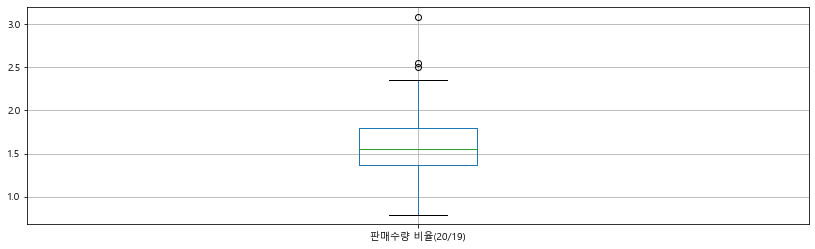

In [241]:
department_total_sales.boxplot(column='판매수량 비율(20/19)')

# 지역별 4분위수

In [467]:
department_total_sales

,shopkey,총 판매량(2019),총 입고량(2019),총 판매량(2020),총 입고량(2020),판매수량 비율(20/19),입고수량 비율(20/19),판매 비율(19/19),판매 비율(20/20),shop_nm,shop_nm_sfdc,repr_shopcode,type_shop_nm,type_contract_nm,type_zone_nm,region_nm
0,X10052,1597,2832,2764,4174,1.730745,1.473870,0.563912,0.662195,롯데강남,디스커버리 롯데 강남점,XH0254,일반매장,백화점특정,백화점,서울
1,X10008,9047,10927,10499,12509,1.160495,1.144779,0.827949,0.839316,롯데건대,디스커버리 롯데 건대점,XH0200,일반매장,백화점특정,백화점,서울
7,X10050,5668,8376,14182,17873,2.502117,2.133835,0.676695,0.793487,롯데본점,디스커버리 롯데 본점,XH0248,일반매장,백화점특정,백화점,서울
11,X10025,2908,4289,4030,5585,1.385832,1.302168,0.678014,0.721576,롯데노원,디스커버리 롯데 노원점,XH0231,일반매장,백화점특정,백화점,서울
12,X10015,1675,2980,2751,4172,1.642388,1.400000,0.562081,0.659396,롯데포항,디스커버리 롯데 포항점,XH0214,일반매장,백화점특정,백화점,경북
13,X10053,4099,5847,7160,9432,1.746768,1.613135,0.701043,0.759118,신세계경기,디스커버리 신세계 경기점,XH0246,일반매장,백화점특정,백화점,경기
14,X10073,2384,3835,3347,4894,1.403943,1.276141,0.621643,0.683899,신세계마산,디스커버리 신세계 마산점,XH264,일반매장,백화점특정,백화점,경남
17,X10035,4029,5754,6309,8486,1.565897,1.474800,0.700209,0.743460,신세계의정부,디스커버리 신세계 의정부점,XH0226,일반매장,백화점특정,백화점,경기
18,X10080,3372,5372,3840,5663,1.138790,1.054170,0.627699,0.678086,엔터6왕십리,디스커버리 엔터식스 왕십리점,XH0266,일반매장,백화점특정,백화점,서울
23,X10060,6590,8481,10269,12451,1.558270,1.468105,0.777031,0.824753,AK수원,디스커버리 AK 수원점,XH0259,일반매장,백화점특정,백화점,경기


In [250]:
print(Q1 - 1.5 * IQR)

0.7225455441728312


In [ ]:
Q1 = department_total_sales['판매수량 비율(20/19)'].quantile(.25)
Q3 = department_total_sales['판매수량 비율(20/19)'].quantile(.75)
IQR = Q3 - Q1
Q2 = department_total_sales['판매수량 비율(20/19)'].quantile(.5)
Q4 = department_total_sales['판매수량 비율(20/19)'].quantile(1)

In [242]:
Q1 = department_total_sales['판매수량 비율(20/19)'].quantile(.25)
Q3 = department_total_sales['판매수량 비율(20/19)'].quantile(.75)
IQR = Q3 - Q1
Q2 = department_total_sales['판매수량 비율(20/19)'].quantile(.5)
Q4 = department_total_sales['판매수량 비율(20/19)'].quantile(1)

In [259]:
q4 = department_total_sales[department_total_sales['판매수량 비율(20/19)']<Q1]
q3 = department_total_sales[(department_total_sales['판매수량 비율(20/19)']>Q1)&(department_total_sales['판매수량 비율(20/19)']<Q2)]
q2 = department_total_sales[(department_total_sales['판매수량 비율(20/19)']>Q2)&(department_total_sales['판매수량 비율(20/19)']<Q3)]
q1 = department_total_sales[(department_total_sales['판매수량 비율(20/19)']>Q3)&(department_total_sales['판매수량 비율(20/19)']<Q3+1.5*IQR)]
q0 = department_total_sales[((department_total_sales['판매수량 비율(20/19)']>Q3+1.5*IQR))]

In [260]:
q3 = department_total_sales[(department_total_sales['판매수량 비율(20/19)']>Q1)&(department_total_sales['판매수량 비율(20/19)']<Q2)]

In [261]:
q2 = department_total_sales[(department_total_sales['판매수량 비율(20/19)']>Q2)&(department_total_sales['판매수량 비율(20/19)']<Q3)]

In [262]:
q1 = department_total_sales[(department_total_sales['판매수량 비율(20/19)']>Q3)&(department_total_sales['판매수량 비율(20/19)']<Q3+1.5*IQR)]

In [264]:
q0 = department_total_sales[((department_total_sales['판매수량 비율(20/19)']>Q3+1.5*IQR))]

In [327]:
q0.groupby('region_nm').count()['shopkey']

region_nm
서울    3
Name: shopkey, dtype: int64

In [457]:
np.mean(q2['차이'])

0.1909391231754469

In [455]:
np.mean(q1['차이'])

0.25803123390325955

In [461]:
q1['차이2'] = q1['판매 비율(20/20)']-q1['판매 비율(19/19)']
q2['차이2'] = q2['판매 비율(20/20)']-q2['판매 비율(19/19)']
q3['차이2'] = q3['판매 비율(20/20)']-q3['판매 비율(19/19)']
q4['차이2'] = q4['판매 비율(20/20)']-q4['판매 비율(19/19)']

<ipython-input-461-3543fec7ae7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1['차이2'] = q1['판매 비율(20/20)']-q1['판매 비율(19/19)']
<ipython-input-461-3543fec7ae7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['차이2'] = q2['판매 비율(20/20)']-q2['판매 비율(19/19)']
<ipython-input-461-3543fec7ae7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [464]:
q0['차이'] = q0['판매수량 비율(20/19)']-q0['입고수량 비율(20/19)']
q0['차이2'] = q0['판매 비율(20/20)']-q0['판매 비율(19/19)']


<ipython-input-464-10ab5382c588>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q0['차이'] = q0['판매수량 비율(20/19)']-q0['입고수량 비율(20/19)']
<ipython-input-464-10ab5382c588>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q0['차이2'] = q0['판매 비율(20/20)']-q0['판매 비율(19/19)']


In [458]:
q1['차이'] = q1['판매수량 비율(20/19)']-q1['입고수량 비율(20/19)']
q2['차이'] = q2['판매수량 비율(20/19)']-q2['입고수량 비율(20/19)']
q3['차이'] = q3['판매수량 비율(20/19)']-q3['입고수량 비율(20/19)']
q4['차이'] = q4['판매수량 비율(20/19)']-q4['입고수량 비율(20/19)']

<ipython-input-458-9e4978f57407>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3['차이'] = q3['판매수량 비율(20/19)']-q3['입고수량 비율(20/19)']
<ipython-input-458-9e4978f57407>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4['차이'] = q4['판매수량 비율(20/19)']-q4['입고수량 비율(20/19)']


In [465]:
print(np.mean(q4['차이2']))
print(np.mean(q3['차이2']))
print(np.mean(q2['차이2']))
print(np.mean(q1['차이2']))
print(np.mean(q0['차이2']))

0.022923280836368527
0.04169314679553482
0.07814265979450925
0.09378629875608084
0.13889889158659185


In [466]:
print(np.mean(q4['차이']))
print(np.mean(q3['차이']))
print(np.mean(q2['차이']))
print(np.mean(q1['차이']))
print(np.mean(q0['차이']))

0.04655491780924295
0.08406471846621139
0.1909391231754469
0.25803123390325955
0.48526839701948915


In [460]:
np.mean(q4['차이'])

0.04655491780924295

In [328]:
q1.groupby('region_nm').count()['shopkey']

region_nm
강원    1
경기    5
경남    1
대구    1
부산    3
서울    2
충남    1
Name: shopkey, dtype: int64

In [343]:
q1.groupby('region_nm').count()['shopkey']

region_nm
강원    1
경기    5
경남    1
대구    1
부산    3
서울    2
충남    1
Name: shopkey, dtype: int64

([<matplotlib.patches.Wedge at 0x27507d543d0>,
 [Text(1.0987909806905718, 0.0515594875173511, '강원'),
  Text(0.7686463552310552, 0.7868816814426517, '경기'),
  Text(-0.17971513354339744, 1.0852200103091902, '경남'),
  Text(-0.47395014253987483, 0.992658683730935, '경북'),
  Text(-0.6084442878662422, 0.9164035948003159, '광주'),
  Text(-0.838953705490461, 0.7114468919348971, '대구'),
  Text(-1.0412772444918716, 0.35460076156632137, '대전'),
  Text(-1.0891347660419954, -0.15422535912958113, '부산'),
  Text(-0.179715076390231, -1.0852200197738953, '서울'),
  Text(0.901888291561796, -0.6297598824502441, '울산'),
  Text(1.0034965255406272, -0.4505493571495687, '전남'),
  Text(1.0412772559044121, -0.3546007280536488, '전북'),
  Text(1.0807088040598822, -0.2051060233817118, '충남'),
  Text(1.0987909821991173, -0.05155945536852736, '충북')],
 [Text(0.59934053492213, 0.02812335682764605, '1.5%'),
  Text(0.41926164830784823, 0.42920818987780995, '22.4%'),
  Text(-0.09802643647821677, 0.5919381874413764, '7.5%'),
  Text(-0

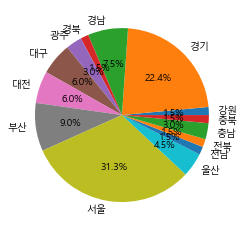

In [345]:
plt.pie(list(department_total_sales.groupby('region_nm').count()['shopkey']), labels=department_total_sales.groupby('region_nm').count()['shopkey'].index, autopct='%.1f%%')


([<matplotlib.patches.Wedge at 0x27507ccc280>],
 [Text(-1.1, 1.3471114790620887e-16, '서울')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

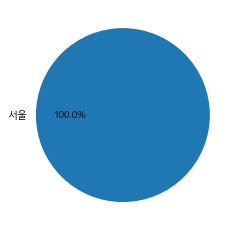

In [344]:
plt.pie(list(q0.groupby('region_nm').count()['shopkey']), labels=q0.groupby('region_nm').count()['shopkey'].index, autopct='%.1f%%')


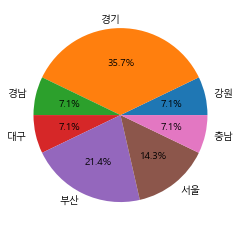

In [340]:
plt.pie(list(q1.groupby('region_nm').count()['shopkey']), labels=q1.groupby('region_nm').count()['shopkey'].index, autopct='%.1f%%')
plt.show()

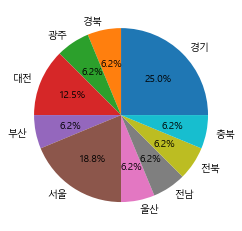

In [338]:
plt.pie(list(q2.groupby('region_nm').count()['shopkey']), labels=q2.groupby('region_nm').count()['shopkey'].index, autopct='%.1f%%')
plt.show()

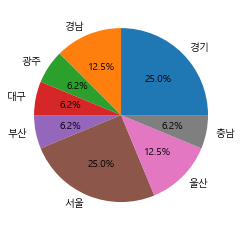

In [339]:
plt.pie(list(q3.groupby('region_nm').count()['shopkey']), labels=q3.groupby('region_nm').count()['shopkey'].index, autopct='%.1f%%')
plt.show()

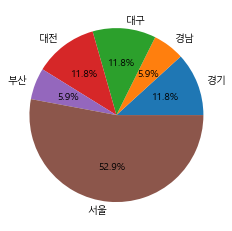

In [337]:
plt.pie(list(q4.groupby('region_nm').count()['shopkey']), labels=q4.groupby('region_nm').count()['shopkey'].index, autopct='%.1f%%')
plt.show()

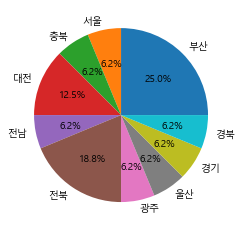

In [279]:
plt.pie(q2.groupby('region_nm').count()['shopkey'], labels=list(set(q2['region_nm'])), autopct='%.1f%%')
plt.show()

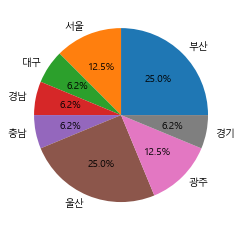

In [280]:
plt.pie(q3.groupby('region_nm').count()['shopkey'], labels=list(set(q3['region_nm'])), autopct='%.1f%%')
plt.show()

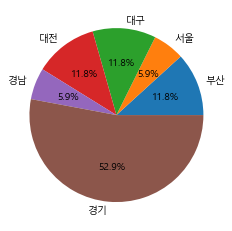

In [281]:
plt.pie(q4.groupby('region_nm').count()['shopkey'], labels=list(set(q4['region_nm'])), autopct='%.1f%%')
plt.show()

In [346]:
department_weeks_mean

,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio
weekkey,,,,,,
2018-12-31,0.763682,0.763682,0.019900,0.019900,0.743781,0.000337
2019-01-07,0.022388,0.786070,0.077114,0.097015,0.689055,0.002469
2019-01-14,0.895522,1.676617,1.024876,1.121891,0.554726,0.027538
2019-01-21,0.781095,2.440299,0.726368,1.848259,0.592040,0.045599
2019-01-28,0.639303,3.057214,0.619403,2.467662,0.589552,0.062993
2019-02-04,0.012438,3.034826,0.970149,3.437811,-0.402985,0.092707
2019-02-11,0.604478,3.616915,0.743781,4.176617,-0.559701,0.110774
2019-02-18,2.174129,5.741294,0.902985,5.077114,0.664179,0.135500
2019-02-25,0.783582,6.462687,1.176617,6.253731,0.208955,0.166079


In [353]:
department_weeks_key = department_total_sales['shopkey'].unique()

In [355]:
shop_weeks_df[shop_weeks_df['shopkey'] == department_weeks_key[0]].groupby('weekkey').sum()

,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio
weekkey,,,,,,
2018-12-31,4,4,0,0,4,0.000000
2019-01-07,0,4,0,0,4,0.000000
2019-01-14,4,8,6,6,2,0.483766
2019-01-21,4,12,1,7,5,0.567100
2019-01-28,1,13,2,9,4,0.824675
2019-02-04,0,13,2,11,2,0.998918
2019-02-11,1,14,1,12,2,1.165584
2019-02-18,5,18,1,13,5,1.498918
2019-02-25,0,18,2,15,3,1.790584


In [ ]:
weekkey

X10052


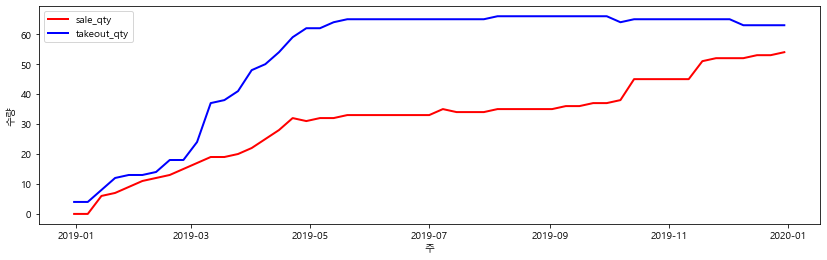

X10008


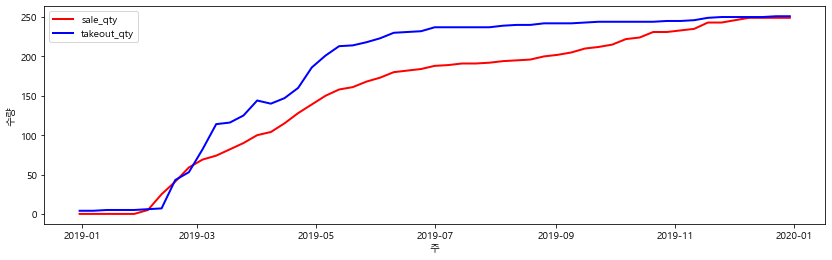

X10050


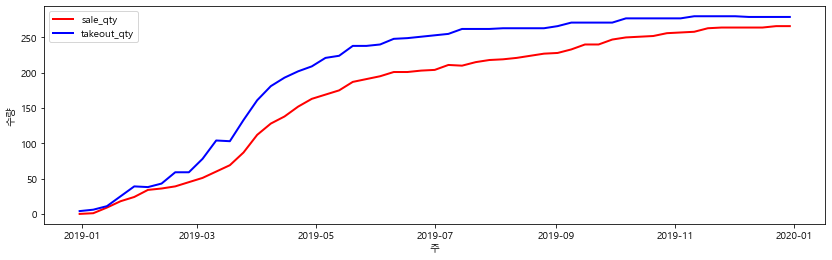

X10025


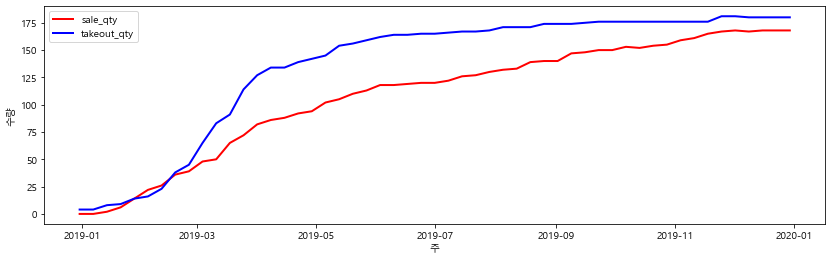

X10015


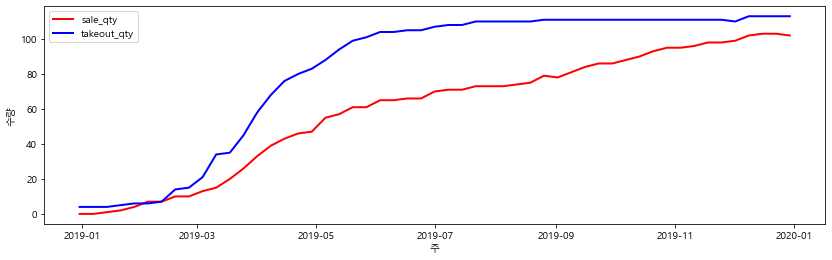

X10053


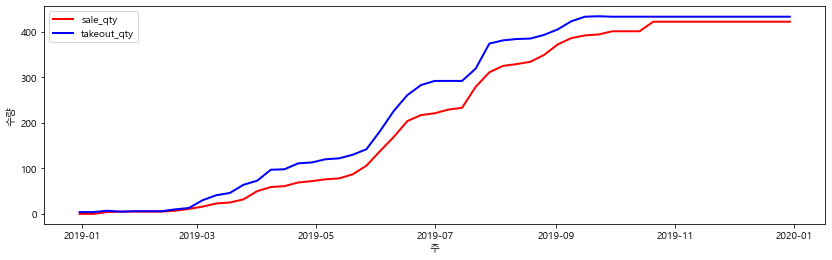

X10073


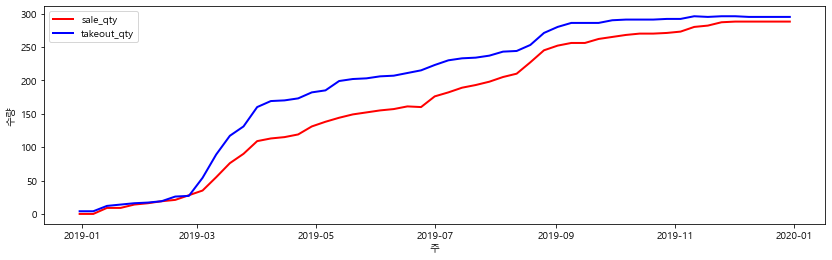

X10035


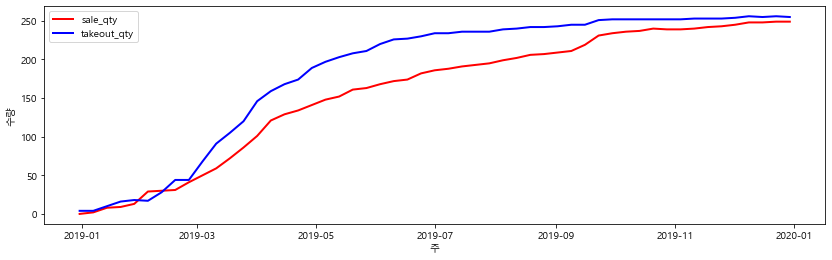

X10080


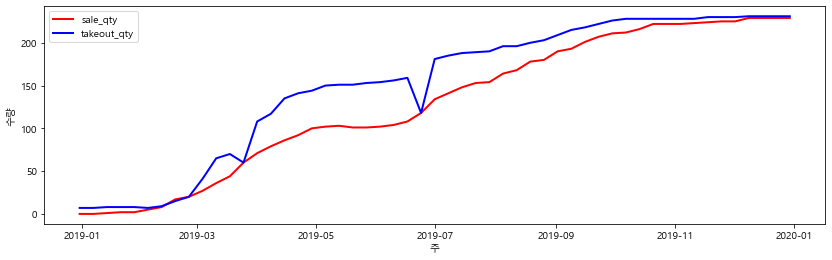

X10060


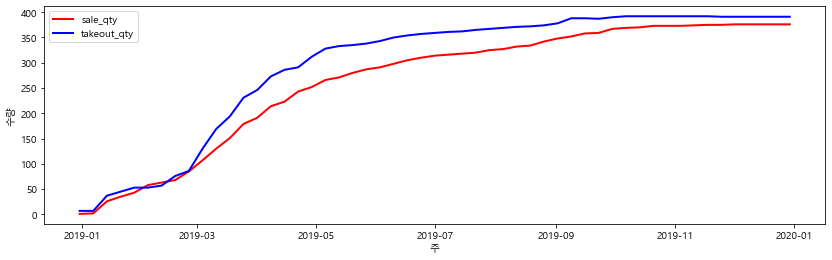

X10076


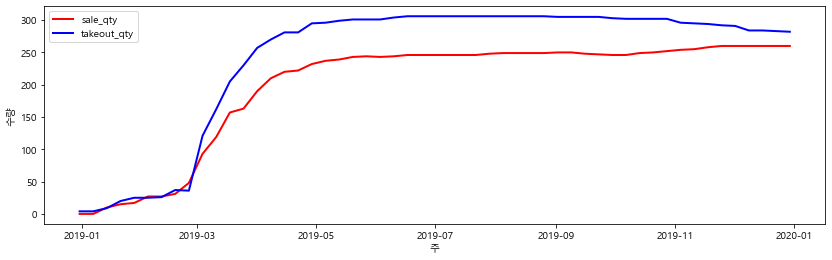

X10067


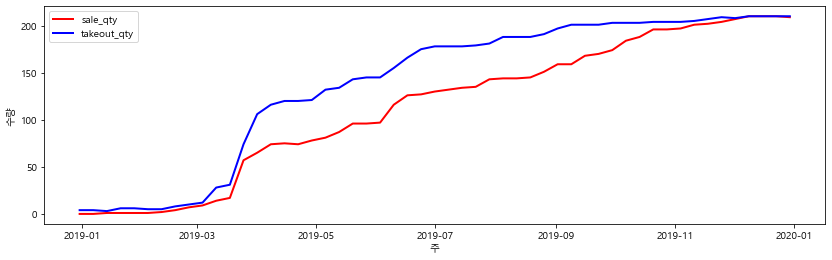

X10022


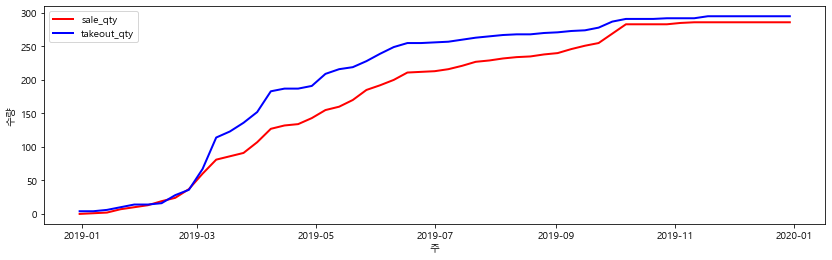

X10016


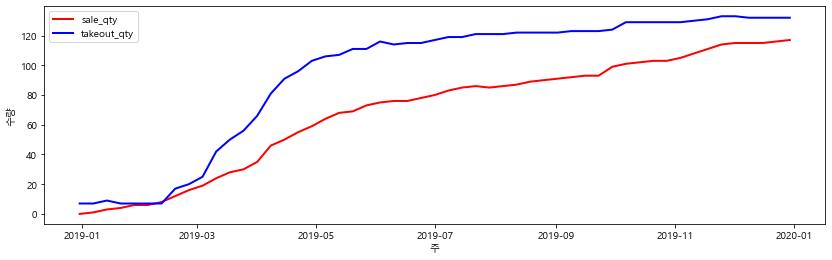

X10064


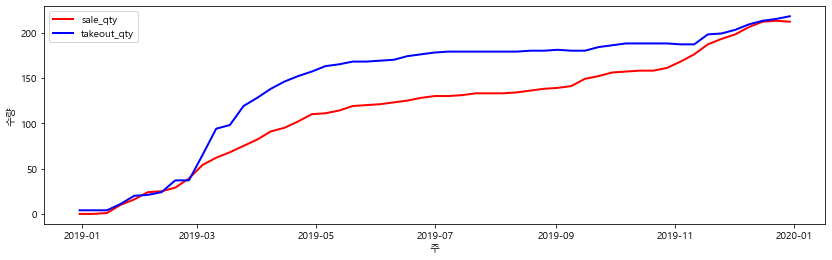

X10004


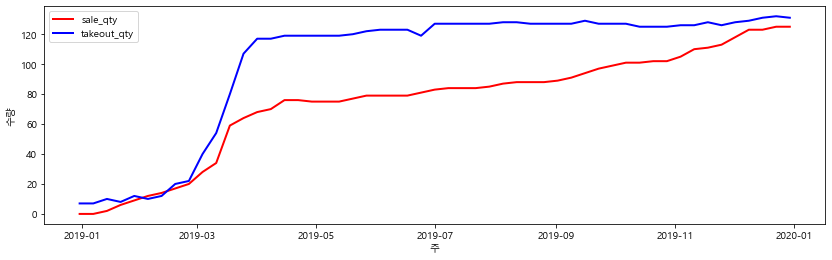

X10014


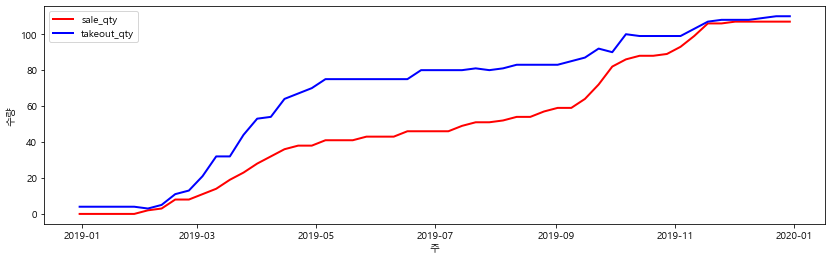

X10039


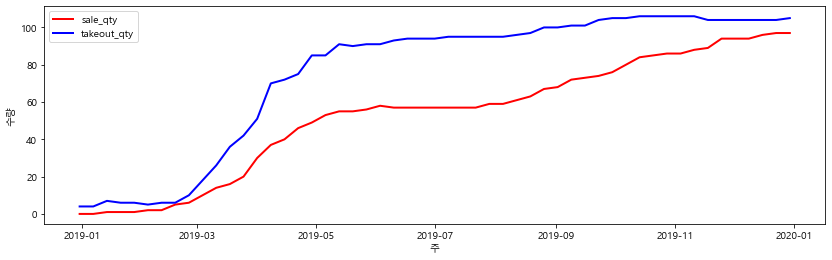

X10082


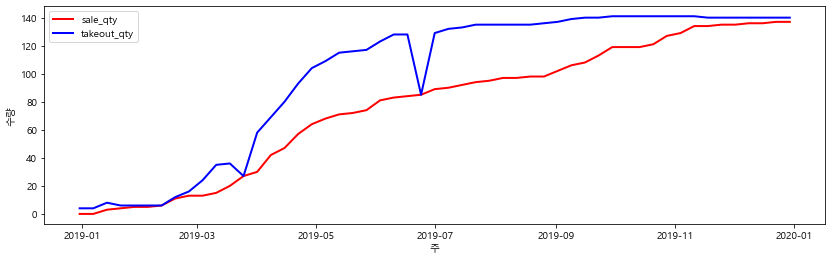

X10085


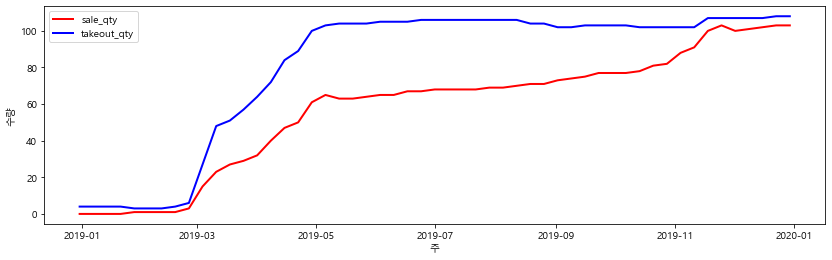

X10018


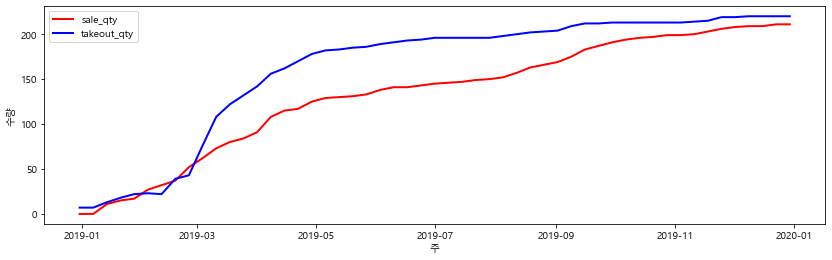

X10019


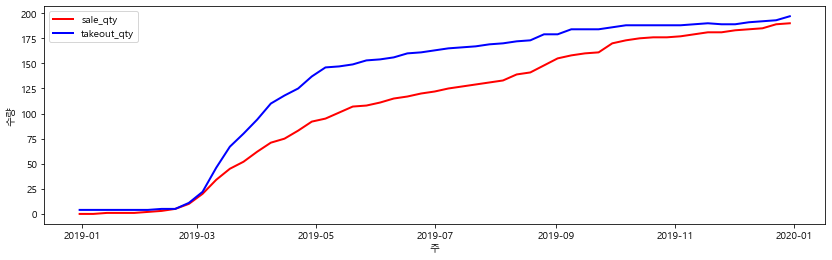

X10047


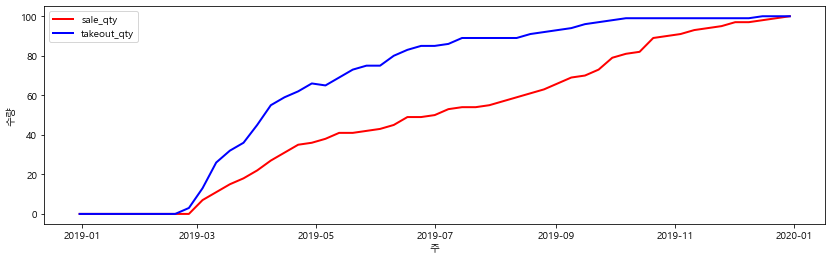

X10055


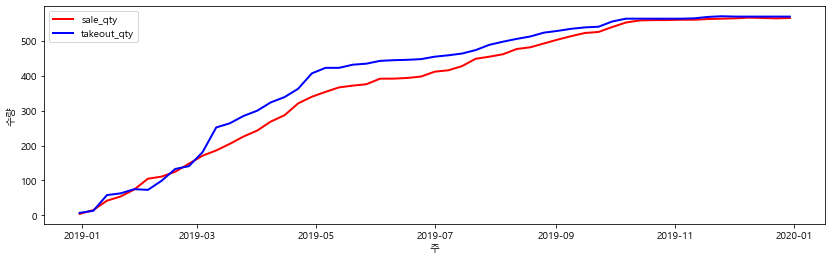

X10075


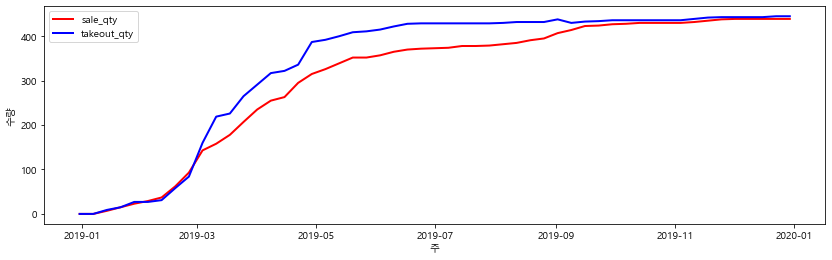

X10021


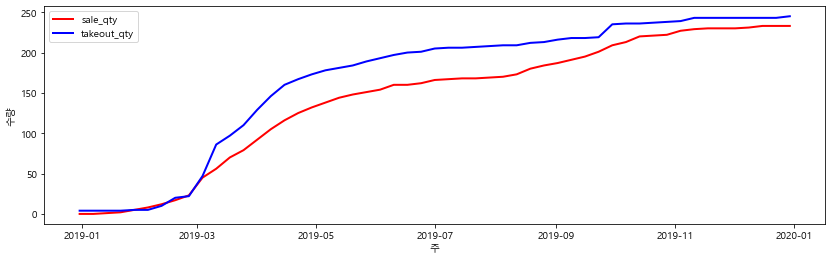

X10086


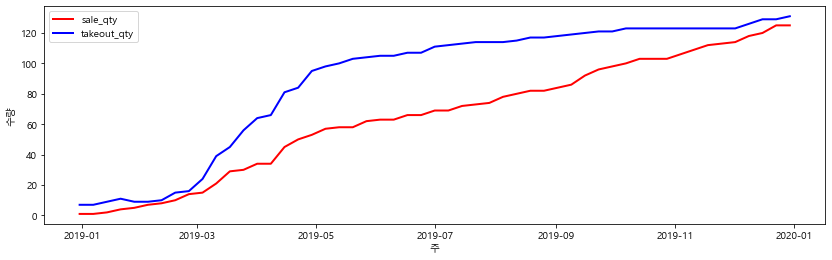

X10034


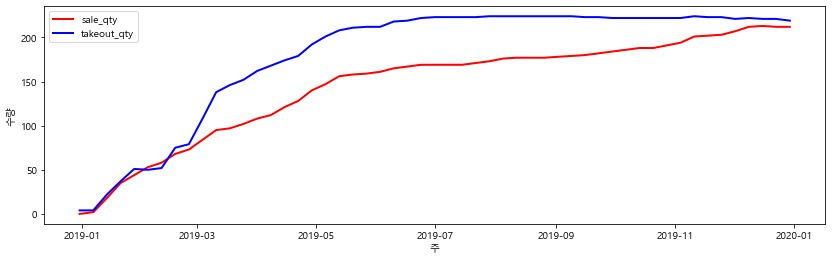

X10033


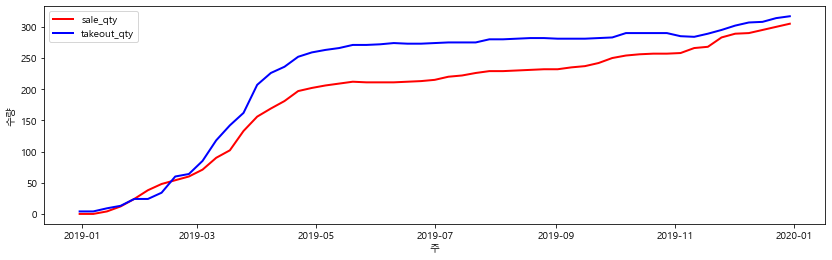

X10044


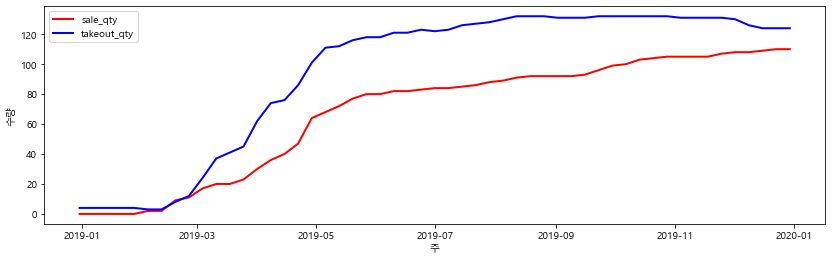

X10007


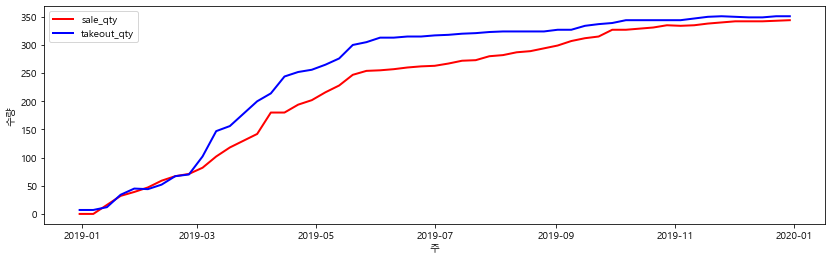

X10041


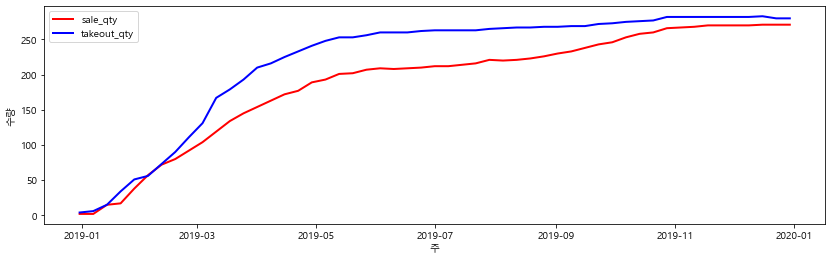

X10030


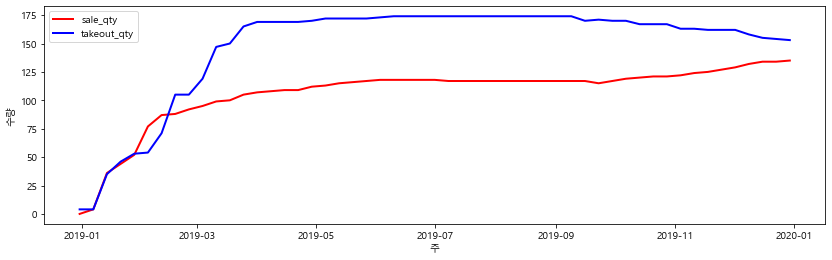

X10038


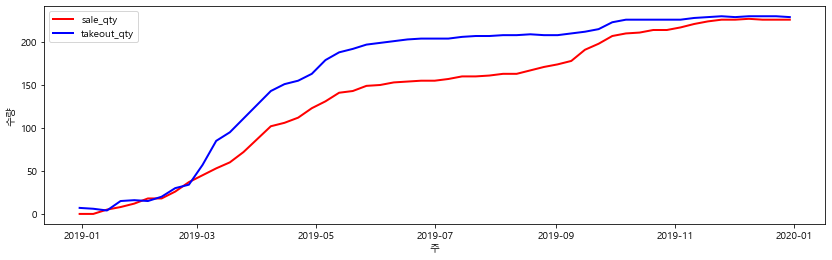

X10056


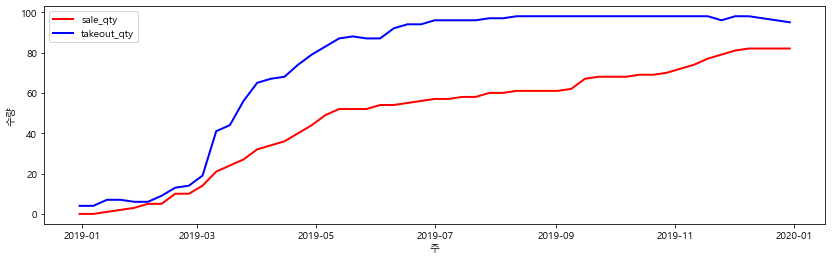

X10046


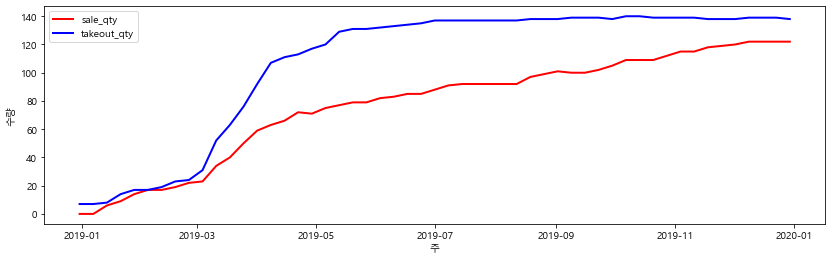

X10027


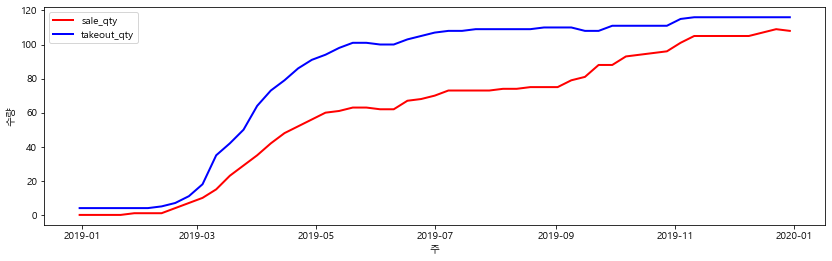

X10070


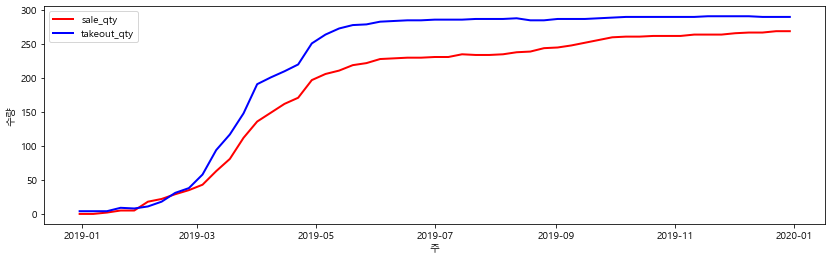

X10061


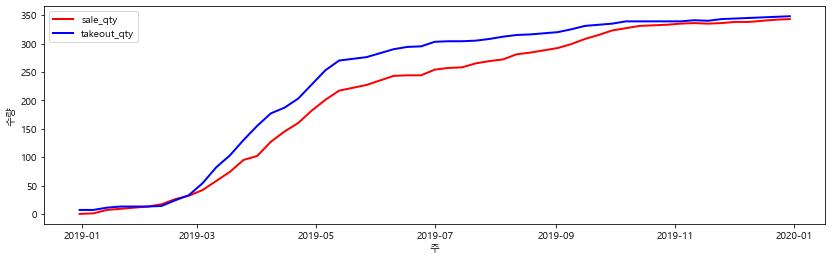

X10081


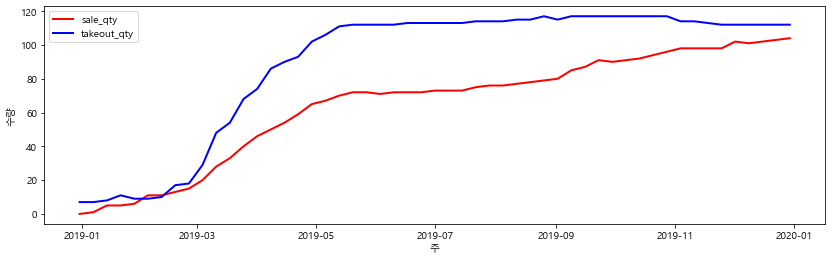

X10048


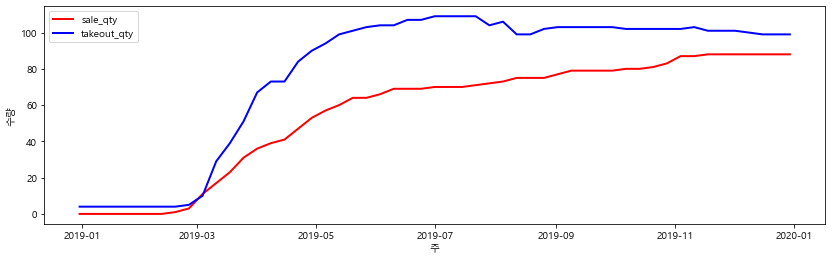

X10059


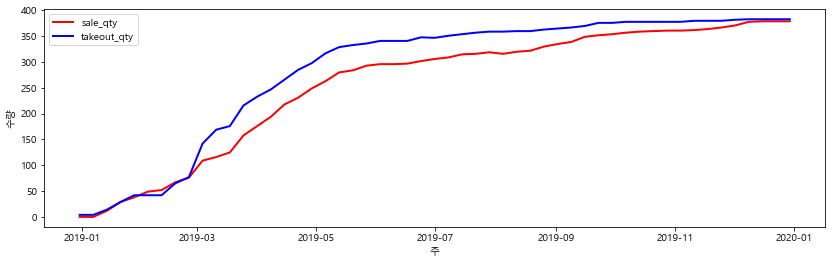

X10065


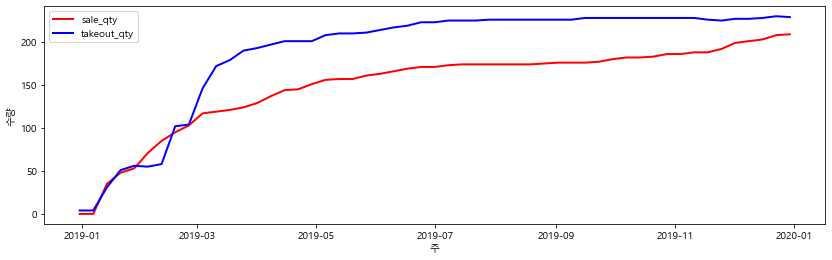

X10058


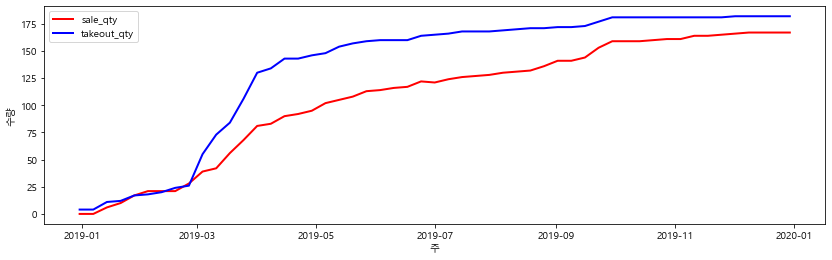

X10003


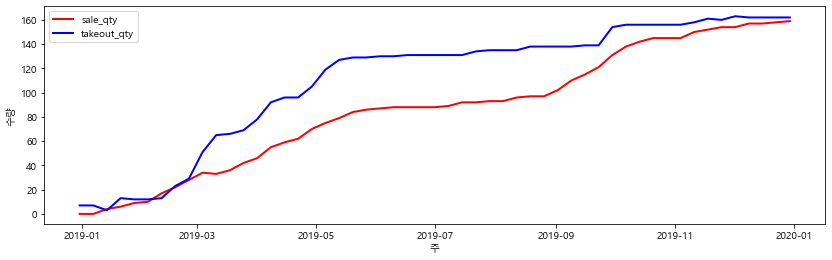

X10005


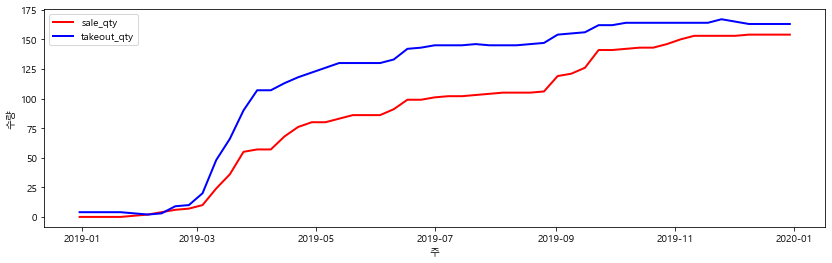

X10029


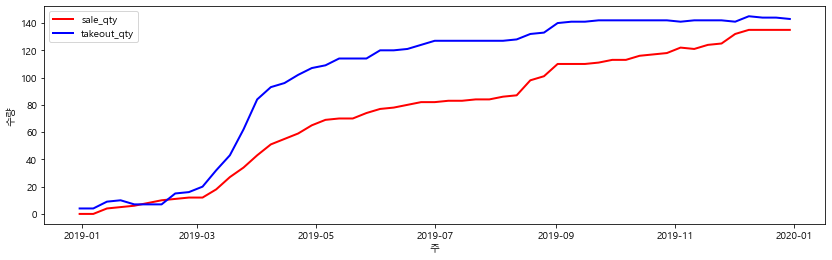

X10068


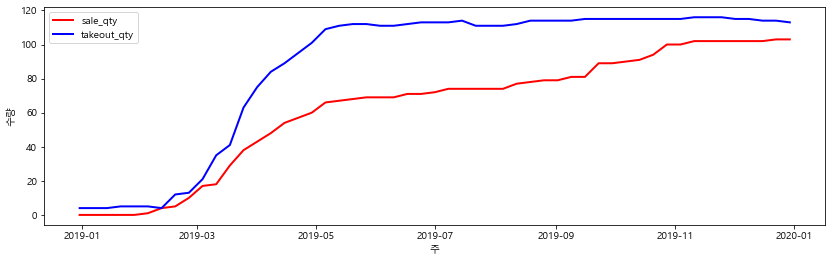

X10051


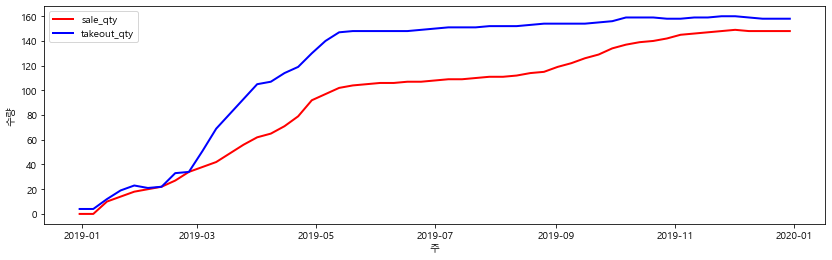

X10028


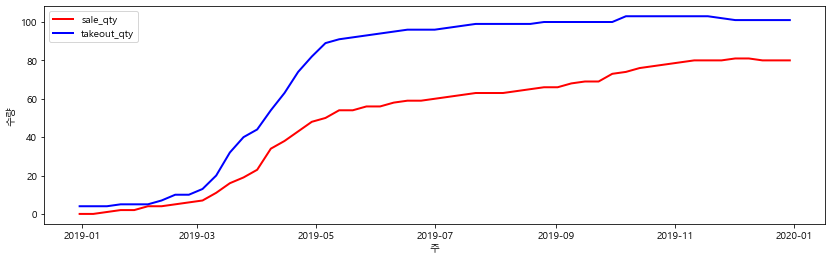

X10023


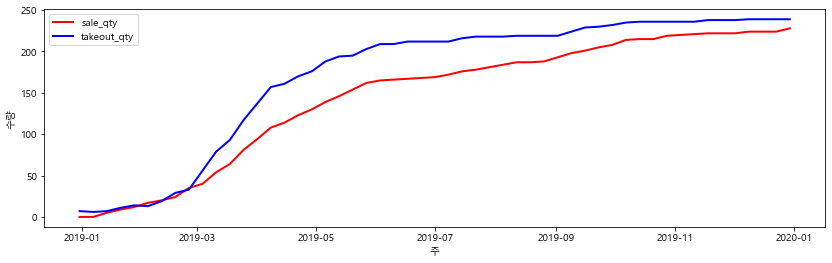

X10063


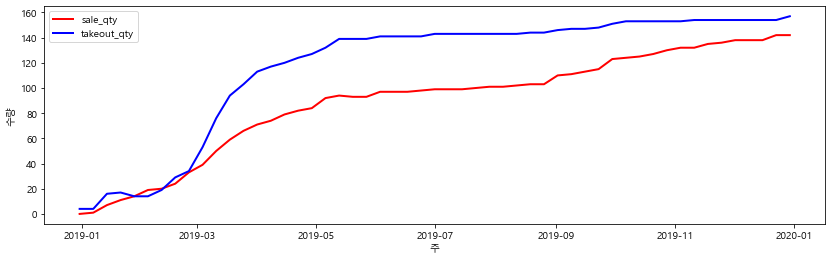

X10011


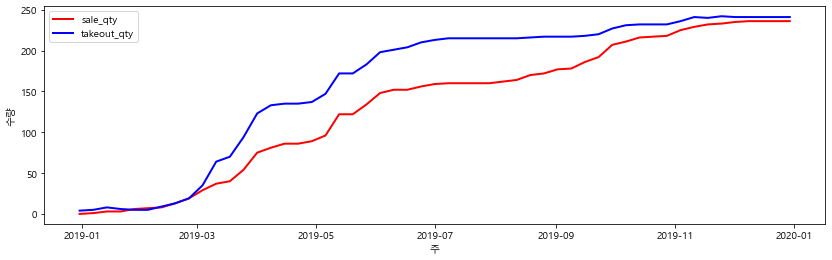

X10036


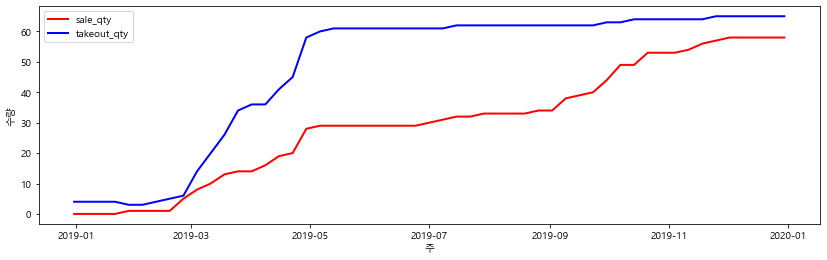

X10078


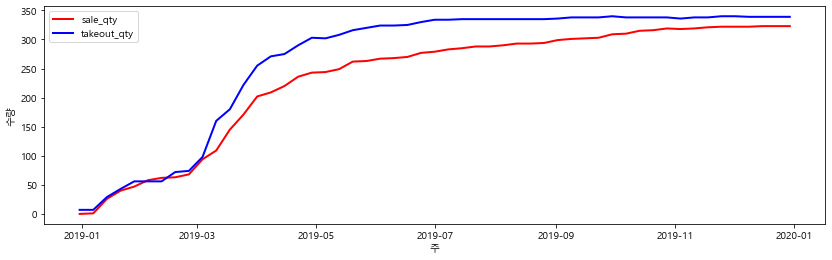

X10077


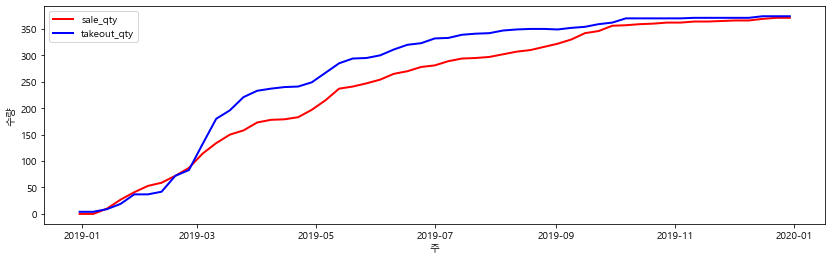

X10079


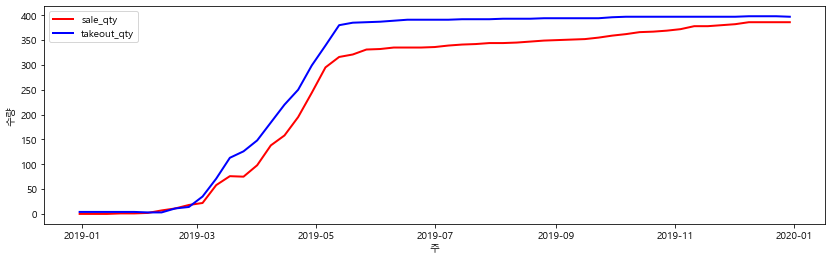

X10006


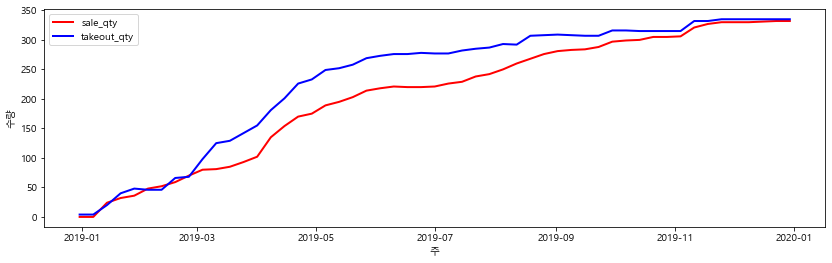

X10057


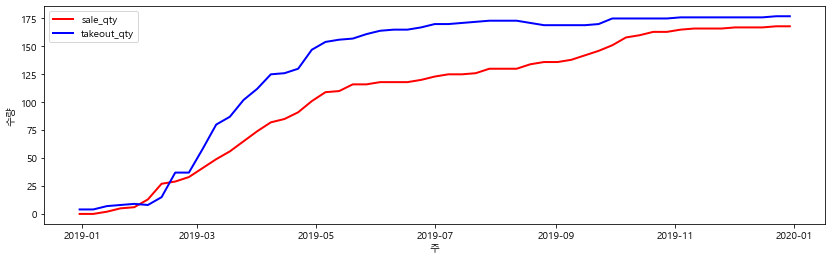

X10009


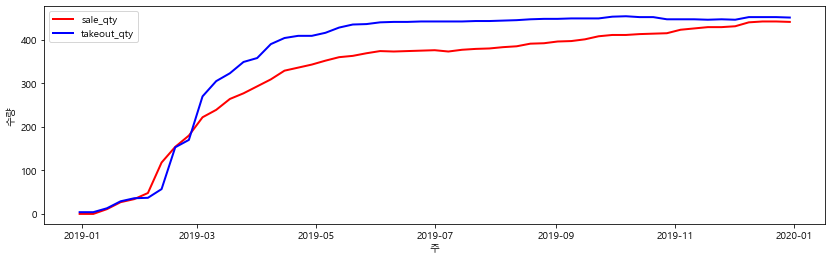

X10045


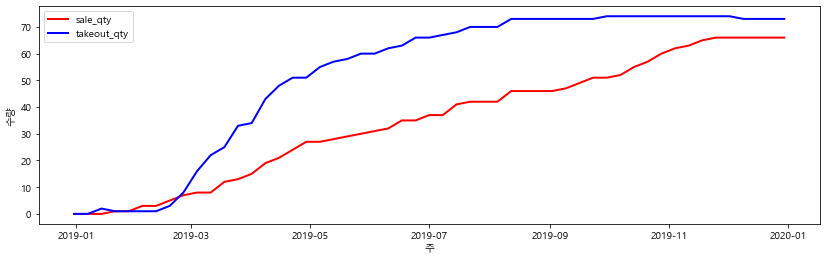

X10026


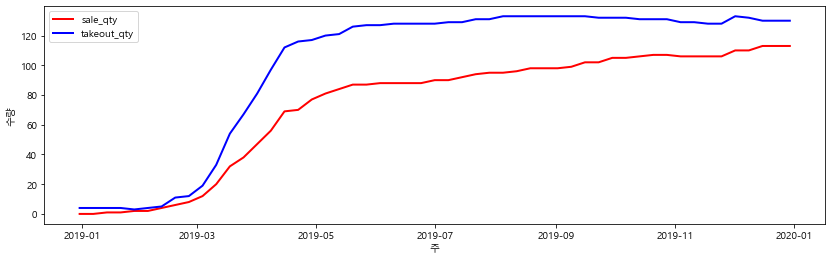

X10062


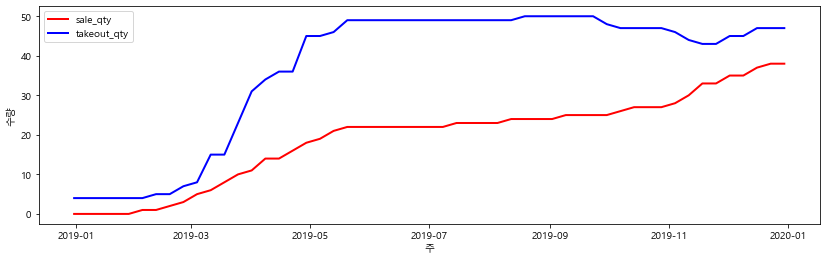

X10069


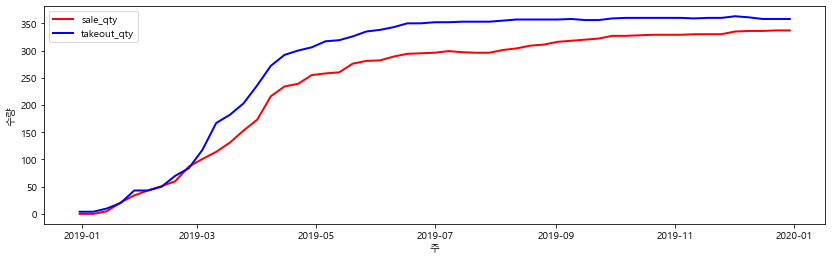

X10032


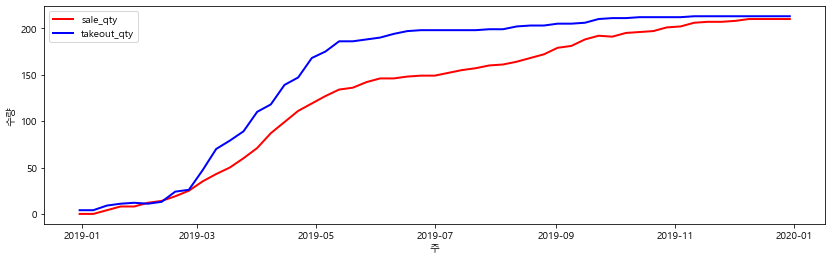

X10043


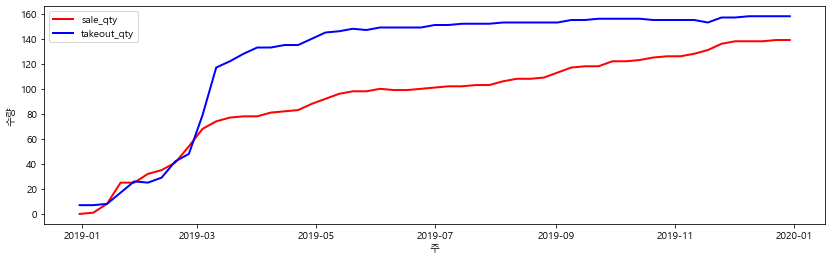

X10020


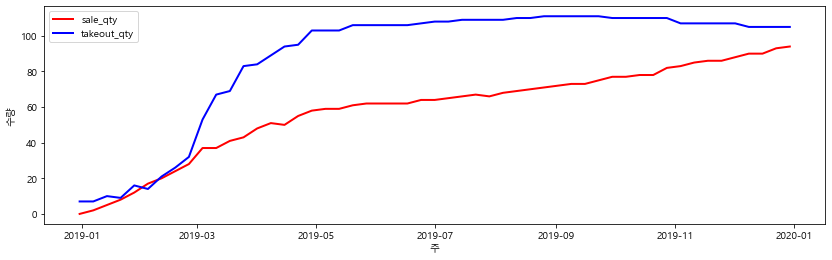

In [359]:
for shop_key in department_weeks_key:
#     shop_weeks_df[shop_weeks_df['shopkey'] == department_weeks_key[0]]
    shop_week = shop_weeks_df[shop_weeks_df['shopkey']== shop_key].groupby('weekkey').sum()
    shop_week = shop_week.reset_index()
    shop_week['weekkey'] = pd.to_datetime(shop_week['weekkey'])

    print(shop_key)
    plt.plot(shop_week['weekkey'], shop_week['sale_qty'],'r')
    plt.plot(shop_week['weekkey'], shop_week['takeout_qty'],'b')
    plt.legend(['sale_qty','takeout_qty'])
    plt.xlabel('주')
    plt.ylabel('수량')
    plt.show()

In [362]:
department_weeks_mean

,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio
weekkey,,,,,,
2018-12-31,0.763682,0.763682,0.019900,0.019900,0.743781,0.000337
2019-01-07,0.022388,0.786070,0.077114,0.097015,0.689055,0.002469
2019-01-14,0.895522,1.676617,1.024876,1.121891,0.554726,0.027538
2019-01-21,0.781095,2.440299,0.726368,1.848259,0.592040,0.045599
2019-01-28,0.639303,3.057214,0.619403,2.467662,0.589552,0.062993
2019-02-04,0.012438,3.034826,0.970149,3.437811,-0.402985,0.092707
2019-02-11,0.604478,3.616915,0.743781,4.176617,-0.559701,0.110774
2019-02-18,2.174129,5.741294,0.902985,5.077114,0.664179,0.135500
2019-02-25,0.783582,6.462687,1.176617,6.253731,0.208955,0.166079


X10016


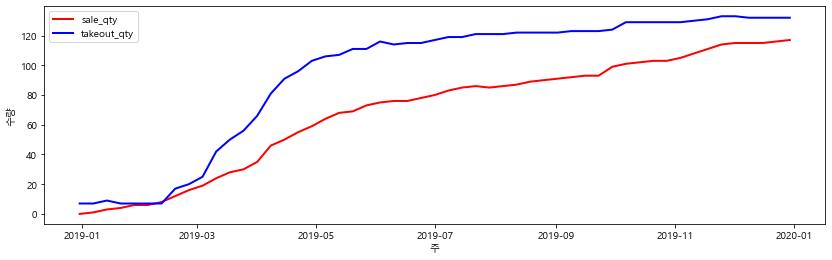

X10064


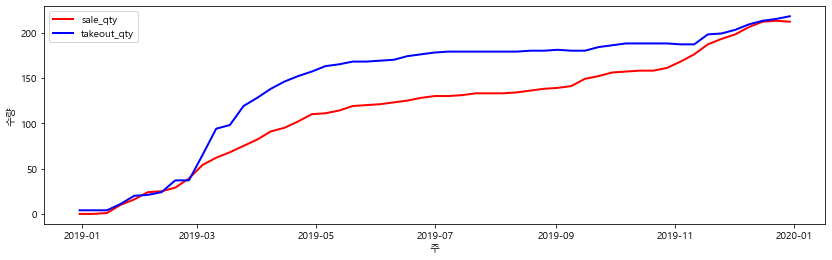

X10039


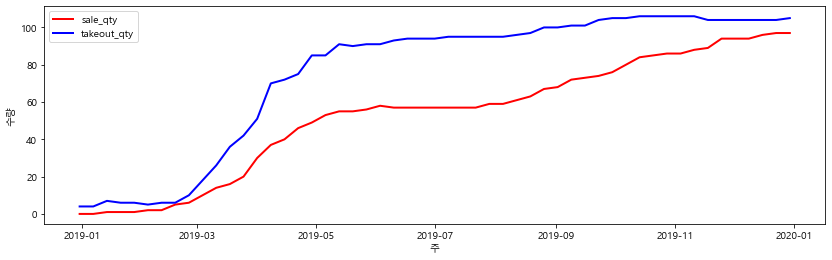

X10021


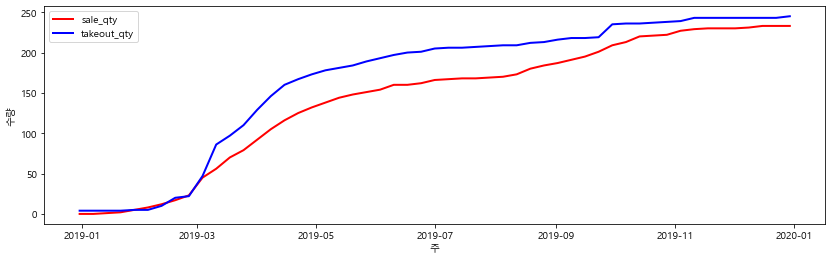

X10034


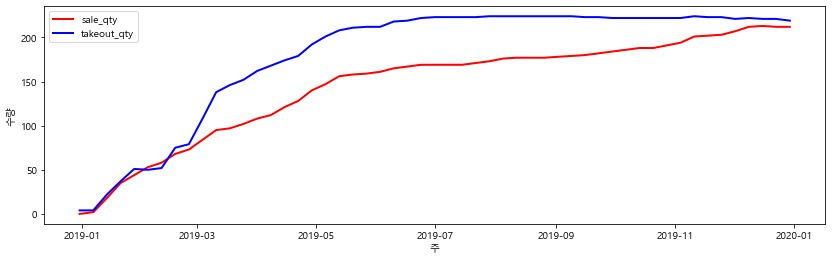

X10056


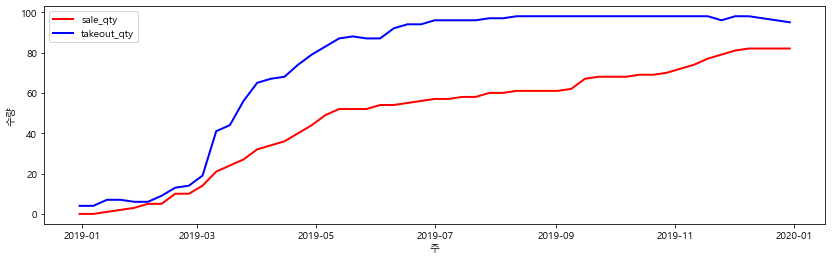

X10027


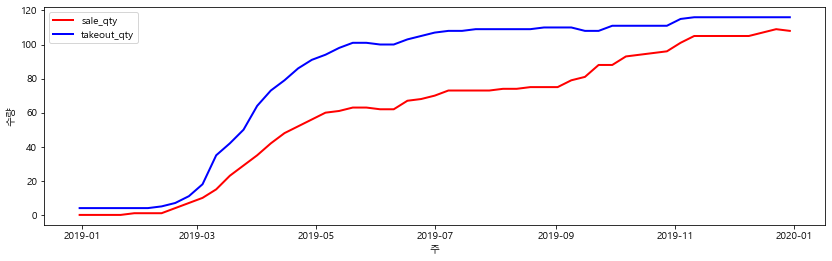

X10061


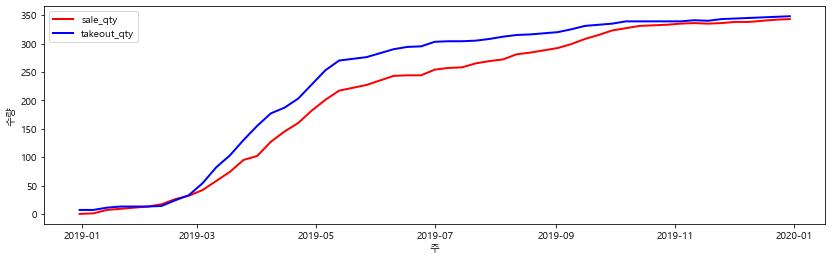

X10048


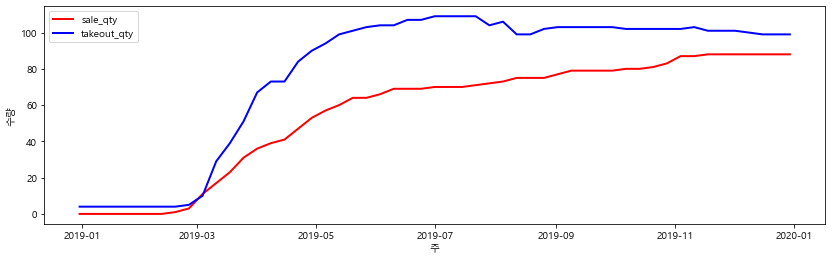

X10003


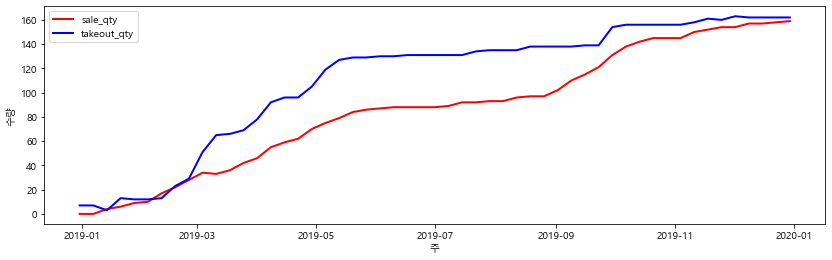

X10028


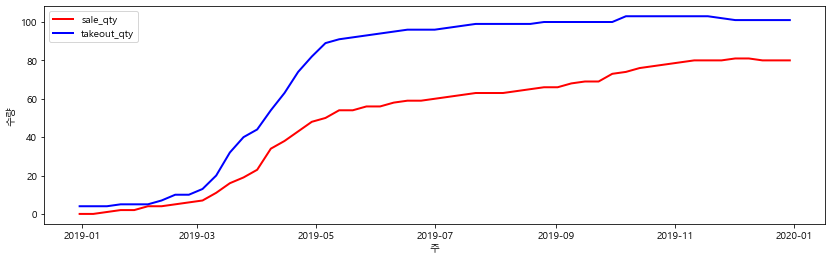

X10006


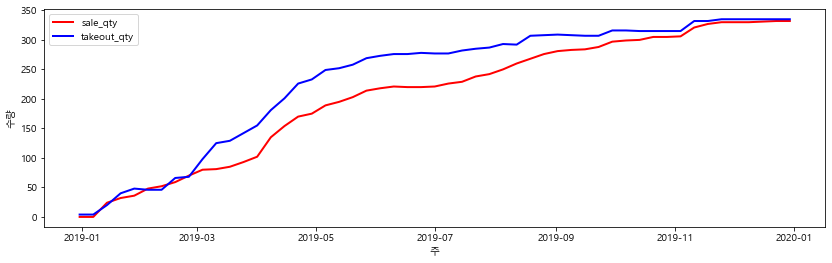

X10069


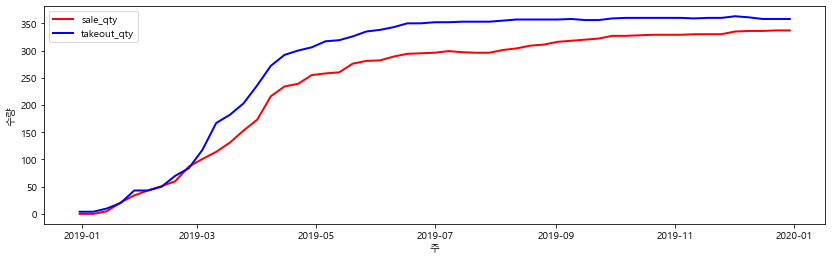

X10032


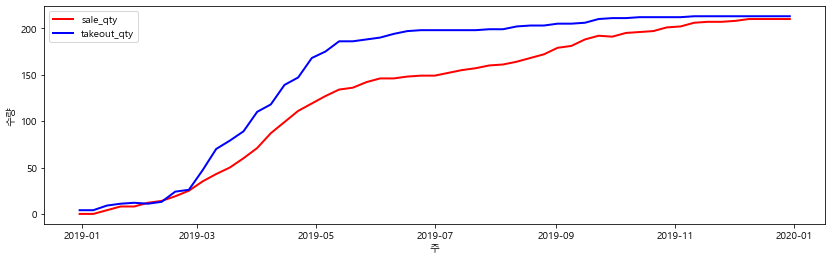

In [407]:
for shop_key in q1['shopkey']:
#     shop_weeks_df[shop_weeks_df['shopkey'] == department_weeks_key[0]]
    shop_week = shop_weeks_df[shop_weeks_df['shopkey']== shop_key].groupby('weekkey').sum()
    shop_week = shop_week.reset_index()
    shop_week['weekkey'] = pd.to_datetime(shop_week['weekkey'])

    print(shop_key)
    plt.plot(shop_week['weekkey'], shop_week['sale_qty'],'r')
    plt.plot(shop_week['weekkey'], shop_week['takeout_qty'],'b')
    plt.legend(['sale_qty','takeout_qty'])
    plt.xlabel('주')
    plt.ylabel('수량')
    plt.show()

In [400]:
one_shop

,weekkey,week_takeout_qty,takeout_qty,week_sale_qty,sale_qty,stock_qty,ratio
0,2018-12-31,4,4,0,0,4,0.000000
1,2019-01-07,0,4,0,0,4,0.000000
2,2019-01-14,3,7,2,2,5,0.011905
3,2019-01-21,1,8,3,5,3,0.029762
4,2019-01-28,1,9,1,6,3,0.035714
5,2019-02-04,0,8,7,13,-5,0.077381
6,2019-02-11,7,15,14,27,-12,0.160714
7,2019-02-18,22,37,2,29,8,0.172619
8,2019-02-25,0,37,4,33,4,0.196429
9,2019-03-04,21,58,8,41,17,0.244048


In [436]:
one_shop.iloc[52]

weekkey             2019-12-30
week_takeout_qty             0
takeout_qty                105
week_sale_qty                1
sale_qty                    94
stock_qty                   11
ratio                        1
Name: 52, dtype: object

In [437]:
count_list=[]
for shop_key in q0['shopkey']:
    one_shop= shop_weeks_df[shop_weeks_df['shopkey']== shop_key].groupby('weekkey').sum()
    one_shop['ratio'] = 0
    one_shop = one_shop.reset_index()
    total_sale_qty= one_shop['week_sale_qty'].sum()
    for i in range(0,len(one_shop)):
        a = one_shop.iloc[i]
#         print(a)
#         break
        one_shop.iloc[i] = [a[0],a[1] ,a[2] ,a[3] ,a[4] ,a[5] , a['sale_qty'] / total_sale_qty]
    count = 0
#     for i in range(0,14):
#         if one_shop.iloc[i]['ratio'] > department_weeks_mean.iloc[i]['ratio']:
#             count+=1
    count_list.append(one_shop.iloc[52]['ratio'])
(sum(count_list)/len(count_list))

1.0

In [438]:
count_list=[]
for shop_key in q1['shopkey']:
    one_shop= shop_weeks_df[shop_weeks_df['shopkey']== shop_key].groupby('weekkey').sum()
    one_shop['ratio'] = 0
    one_shop = one_shop.reset_index()
    total_sale_qty= one_shop['week_sale_qty'].sum()
    for i in range(0,len(one_shop)):
        a = one_shop.iloc[i]
#         print(a)
#         break
        one_shop.iloc[i] = [a[0],a[1] ,a[2] ,a[3] ,a[4] ,a[5] , a['sale_qty'] / total_sale_qty]
    count = 0
#     for i in range(0,15):
#         if one_shop.iloc[i]['ratio'] > department_weeks_mean.iloc[i]['ratio']:
#             count+=1
#     count_list.append(count)
    count_list.append(one_shop.iloc[52]['ratio'])

print((sum(count_list)/len(count_list)))
# print(count_list)

1.0


In [439]:
count_list=[]
for shop_key in q2['shopkey']:
    one_shop= shop_weeks_df[shop_weeks_df['shopkey']== shop_key].groupby('weekkey').sum()
    one_shop['ratio'] = 0
    one_shop = one_shop.reset_index()
    total_sale_qty= one_shop['week_sale_qty'].sum()
    for i in range(0,len(one_shop)):
        a = one_shop.iloc[i]
#         print(a)
#         break
        one_shop.iloc[i] = [a[0],a[1] ,a[2] ,a[3] ,a[4] ,a[5] , a['sale_qty'] / total_sale_qty]
    count = 0
#     for i in range(0,15):
#         if one_shop.iloc[i]['ratio'] > department_weeks_mean.iloc[i]['ratio']:
#             count+=1
#     count_list.append(count)
    count_list.append(one_shop.iloc[52]['ratio'])

print((sum(count_list)/len(count_list)))
# print(count_list)

1.0


In [440]:
count_list=[]
for shop_key in q3['shopkey']:
    one_shop= shop_weeks_df[shop_weeks_df['shopkey']== shop_key].groupby('weekkey').sum()
    one_shop['ratio'] = 0
    one_shop = one_shop.reset_index()
    total_sale_qty= one_shop['week_sale_qty'].sum()
    for i in range(0,len(one_shop)):
        a = one_shop.iloc[i]
#         print(a)
#         break
        one_shop.iloc[i] = [a[0],a[1] ,a[2] ,a[3] ,a[4] ,a[5] , a['sale_qty'] / total_sale_qty]
    count = 0
#     for i in range(0,15):
#         if one_shop.iloc[i]['ratio'] > department_weeks_mean.iloc[i]['ratio']:
#             count+=1
#     count_list.append(count)
    count_list.append(one_shop.iloc[52]['ratio'])

print((sum(count_list)/len(count_list)))
# print(count_list)

0.9997246696035242


In [441]:
count_list=[]
for shop_key in q4['shopkey']:
    one_shop= shop_weeks_df[shop_weeks_df['shopkey']== shop_key].groupby('weekkey').sum()
    one_shop['ratio'] = 0
    one_shop = one_shop.reset_index()
    total_sale_qty= one_shop['week_sale_qty'].sum()
    for i in range(0,len(one_shop)):
        a = one_shop.iloc[i]
#         print(a)
#         break
        one_shop.iloc[i] = [a[0],a[1] ,a[2] ,a[3] ,a[4] ,a[5] , a['sale_qty'] / total_sale_qty]
    count = 0
#     for i in range(0,15):
#         if one_shop.iloc[i]['ratio'] > department_weeks_mean.iloc[i]['ratio']:
#             count+=1
#     count_list.append(count)
    count_list.append(one_shop.iloc[52]['ratio'])

print((sum(count_list)/len(count_list)))
# print(count_list)

0.9989183932682383
